# Исследование популярности игр интернет-магазина 

***Цель исследования*** - выявить закономерности влияющие на успешность игры у пользователей для улучшения продаж последующих игр

***Описание исследования***

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Данные до 2016 года. Необходимо спланировать кампанию на 2017 год. 

***Ход исследования***

Необходимо произвести предобработку данных, проверить данные на аномалии. Привести данные к хорошему стилю. После этого сможем произвести исследовательский анализ данных, составить портрет пользователя, затем выдвинуть и проверить гипотезы. 

### Обзор данных

Импортируем необходимые библиотеки для работы с проектом:

In [1]:
# импортируем библиотеку pandas
import pandas as pd

# импортируем библиотеку numpy
import numpy as np

# импортируем библиотеку matplotlib
import matplotlib.pyplot as plt

# установка стиля для диаграмм
plt.style.use('seaborn-dark') 

# импортируем библиотеку seaborn
import seaborn as sns

# импортируем библиотеку stats
from scipy import stats as st

# просим pandas отображать до 50 столбцов в таблице
pd.options.display.max_columns = 50

# увеличивает четкость диаграмм
%config InlineBackend.figure_format = 'retina'

Прочитаем данные из файла games.csv папки /datasets и сохраним в переменной data:

In [2]:
# чтение файла с данными, с учетом разделителя ',' и сохранение его в переменной data
data = pd.read_csv('/datasets/games.csv', sep=',')

Выведем первые 5 строк таблицы:

In [3]:
# выводим первые 5 строк таблицы data
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Получим общую информацию о таблице:

In [4]:
# выводим общую информацию о таблице data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 11 столбцов. Данные представлены типами object и float. Есть пропуски данных, их потребуется обработать на дальнейших шагах. 

Согласно документации:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Данные за 2016 год могут быть неполными.

#### Вывод

Мы открыли таблицу, и проверили данные. Предварительно:
- есть отклонения в названиях столбцов от хорошего стиля, необходимо обработать названия столбцов 
- есть пропуски в данных, необходимо проверить возможность их заполнить
- необходимо проверить данные на аномалии, не явные и явные дубликаты

### Предобработка данных

Для начала обработки выведем названия столбцов:

In [5]:
# выводим все наименования столбцов таблицы data
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

В названиях многих столбуов используются заглавные буквы, что противоречит хорошему стилю. Скорректируем названия столбцов:

In [6]:
# переименуем название столбцов в таблице data
data.columns = data.columns.str.lower()

Далее обработаем пропуски. Пропуски у нас есть в столбцах year_of_release (год выпуска), critic_score (оценка критиков), user_score (оценка пользователей), rating (рейтинг). Также в двух строках пропущены данные в столбцах name (название) и genre (жанр). 

Проверим сначала данные две строки:

In [7]:
# выводим строки с пропущенными данными в столбце name
name_ganre = data[data['name'].isna()]
name_ganre

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим, что пропуски в данных по имени и жанру игры в одних и тех же строках. Возможно, они не были заполнены случайно. В целом по ним очень мало полезных данных. Удалим такие строки. 

In [8]:
# удаляем строки с пропусками в столбце name
data = data.dropna(subset=['name'])
# выводим информацию по таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Пропуски есть в данных по году выпуска. В целом информация в этих строчках может быть полезной, поэтому просто удалять их сразу не стоит. Проверим какой процент данных пропущен от общего количества данных:

In [9]:
# проверяем долю пропущенных значений в столбце year_of_release от общего количества значений
share_year_of_release = data['year_of_release'].isna().mean()
print(f'{share_year_of_release:.2%}')

1.61%


В целом таких данных только 1,6%. Без их удаления мы никак не можем привести значения столбца к целочисленным. Поэтому все же произведем их удаление и переведем значения столбце к целочисленным значениям:

In [10]:
# удаляем пропуски в столбце year_of_release
data = data.dropna(subset=['year_of_release'])
# переводим значения столбца year_of_release к целочисленным значениям
data['year_of_release'] = data['year_of_release'].astype(int)
# выводим данные о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


У нас есть пропуски в столбце rating. Для удобства проверки гипотез, заполним пропуски в данных значением unknown:

In [11]:
# заполняем пропуски в столбце рейтинг значением unknown
data['rating'] = data['rating'].fillna('unknown')

В столбцах critic_score, user_score есть пропущенные значения. У нас недостаточно данных для заполнения этих пропусков, поэтому оставим их. 

Данные в столбце по оценке пользователей указан тип данные object. Проверим какие значения в нем находятся:

In [12]:
# проверяем какие есть уникальные значения в столбце user_score и их количество
data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.2       2
0.3       2
1         2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

В данных есть оценка tbd (подлежит уточнению). Ставить рейтинг 0 не корректно в этом случае, но из-за этого показывается некорректный тип данных. Думаю будет корректно оставить пропуски вместо таких значений. 

In [13]:
# переводим данные в столбце user_score в числовые данные, не числовые данные меняем на nan
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
# выводим информацию о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Проверим данные на наличие явных дубликатов:

In [14]:
# проверяем данные по явным дубликатов
data.duplicated().sum()

0

Явных дубликатов в данных нет. Для дальнейшего анализа посчитаем общую сумму продаж за каждую игру:

In [15]:
# применим функцию к каждой строке таблицы и запишем резутат в столбец all_sales
data['all_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
# выводишь первые несколько строк таблицы
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


#### Вывод

Мы произвели предобработку данных таблицы:
- привели названия столбцов к хорошему стилю 
- приняли решение и произвели удаление строк, где нет названия и жанра игры (их всего две) и строк, где нет информации о годе выпуска игры, так как без этих данных не сможем произвести дальнейший анализ. В итоге удалено меньше 2% всех данных
- привели данные в столбце с годом выпуска игры к целочисленным значениям
- остались пропуски в столбцах critic_score, user_score, rating - для заполнения этих пропусков у нас нет достаточно данных
- в столбце user_score был рейтинг tbd (подлежит уточнению). Мы убрали этот рейтинг для удобства работы с данными. Так как у нас пока нет информации о рейтинге в этих играх заполнить данные медианой или нулями было бы не корректно
- добавили дополнительный столбец all_sales, в котором посчитали общую сумму продаж по всем регионам

Переходим к исследованию данных. 

### Исследовательский анализ данных

#### Предварительный анализ, выявление актуального периода

Основная цель нашего исследования - это выявить закономерности в продажах игр, которые позволят нам в дальнейшем улучшить продажи в 2017 году. Проверим информацию сколько игр выпускалось в разные годы:

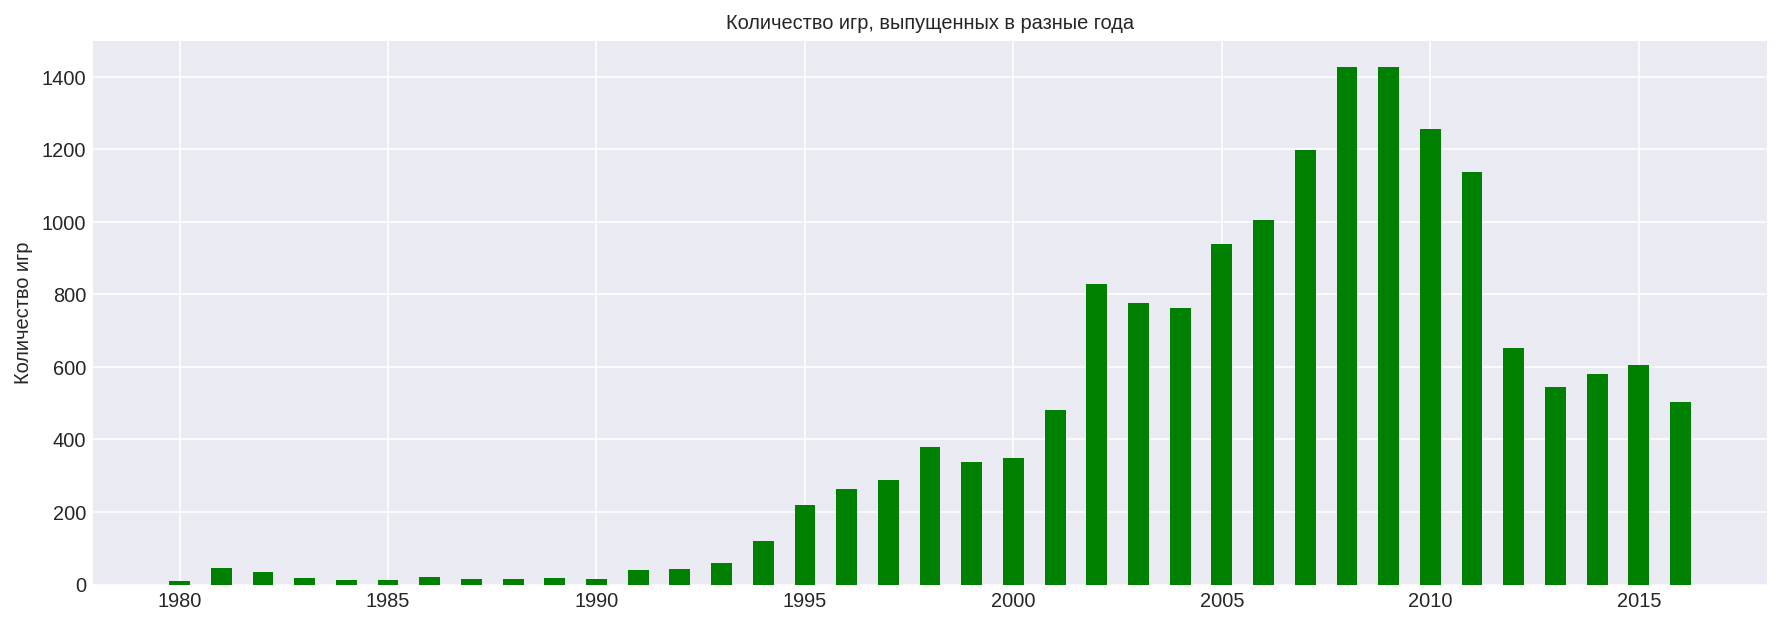

In [16]:
# сгруппируем данные в таблице data по годам выпуска игр, посчитаем количество игр, которое было выпущено в разные года
game_year = data.groupby('year_of_release')['name'].count().reset_index(name='counts')

# выводим столбчатую диаграмму количества выпущенных игр в зависимости от года
plt.figure(figsize=(15,5))
plt.bar(game_year['year_of_release'], game_year['counts'], color='green', width=.5)
plt.grid(which='major')
plt.title("Количество игр, выпущенных в разные года", fontsize=10)
plt.ylabel('Количество игр')
plt.show()

Основные игры были выпущены после 1995 года. Пик выпуска игр приходится на 2008-2009 года. Далее тенденция по выпуску новых игр падает. Рассмотрим информацию по продажам игр в разные годы. Возможно, игр стали выпускать меньше, но при этом их качество дает возможность получать больше продаж:

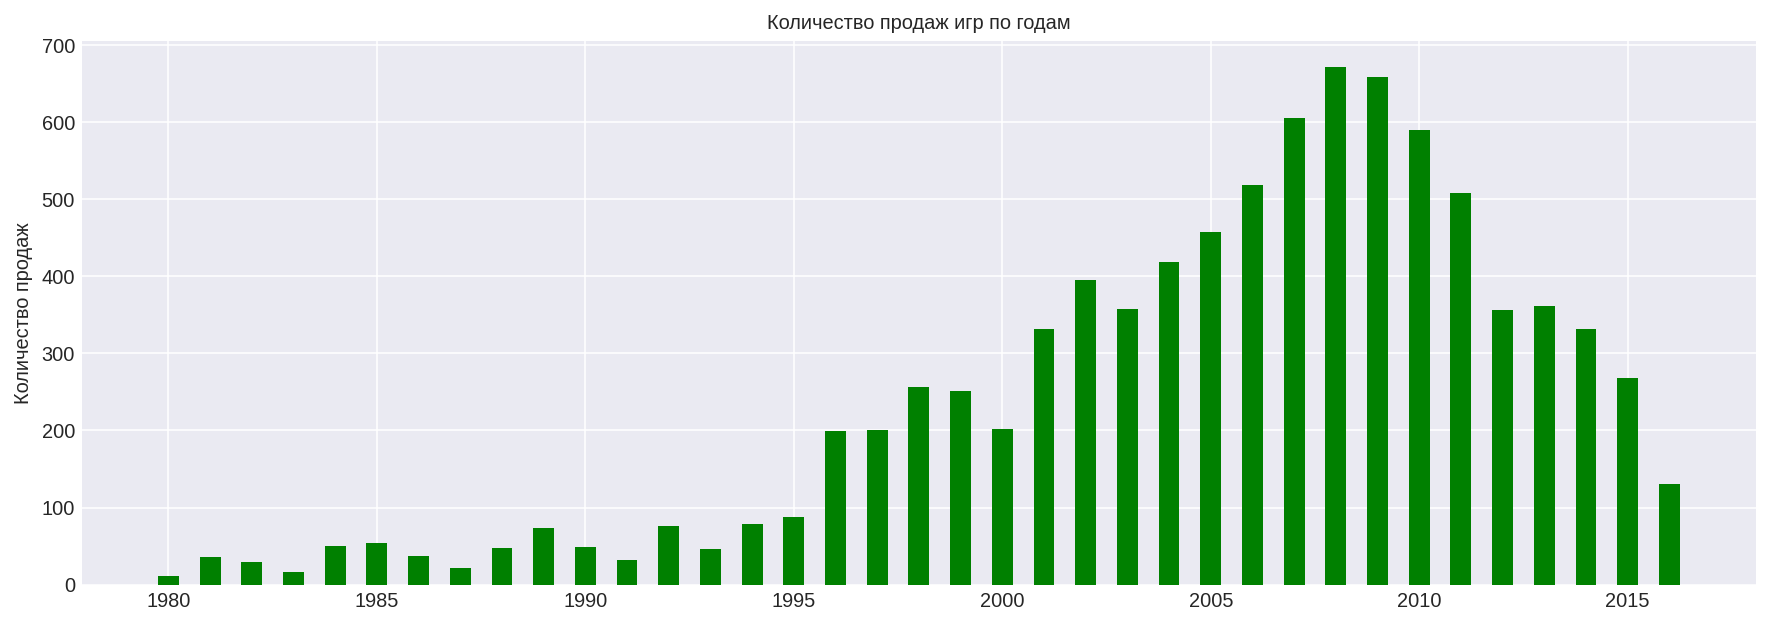

In [17]:
# сгруппируем данные в таблице data по годам выпуска игр, посчитаем сумму продаж игр в разные годы
game_sales = data.groupby('year_of_release')['all_sales'].sum().reset_index(name='sum_sales')

# выводим столбчатую диаграмму количества продаж игр в зависимости от года
plt.figure(figsize=(15,5))
plt.bar(game_sales['year_of_release'], game_sales['sum_sales'], color='green', width=.5)
plt.grid(which='major')
plt.title("Количество продаж игр по годам", fontsize=10)
plt.ylabel('Количество продаж')
plt.show()

Тут мы видим такую же картину. С 1996 года видим, что сумма продаж игр стала расти. Пик приходится на 2008-2009 годы. С 2012 года падает как общее количество выпущенных игр на всех платформах, так и количество продаж этих игр. Посмотрим, какие платформы приносили за все время наибольшее количество продаж:

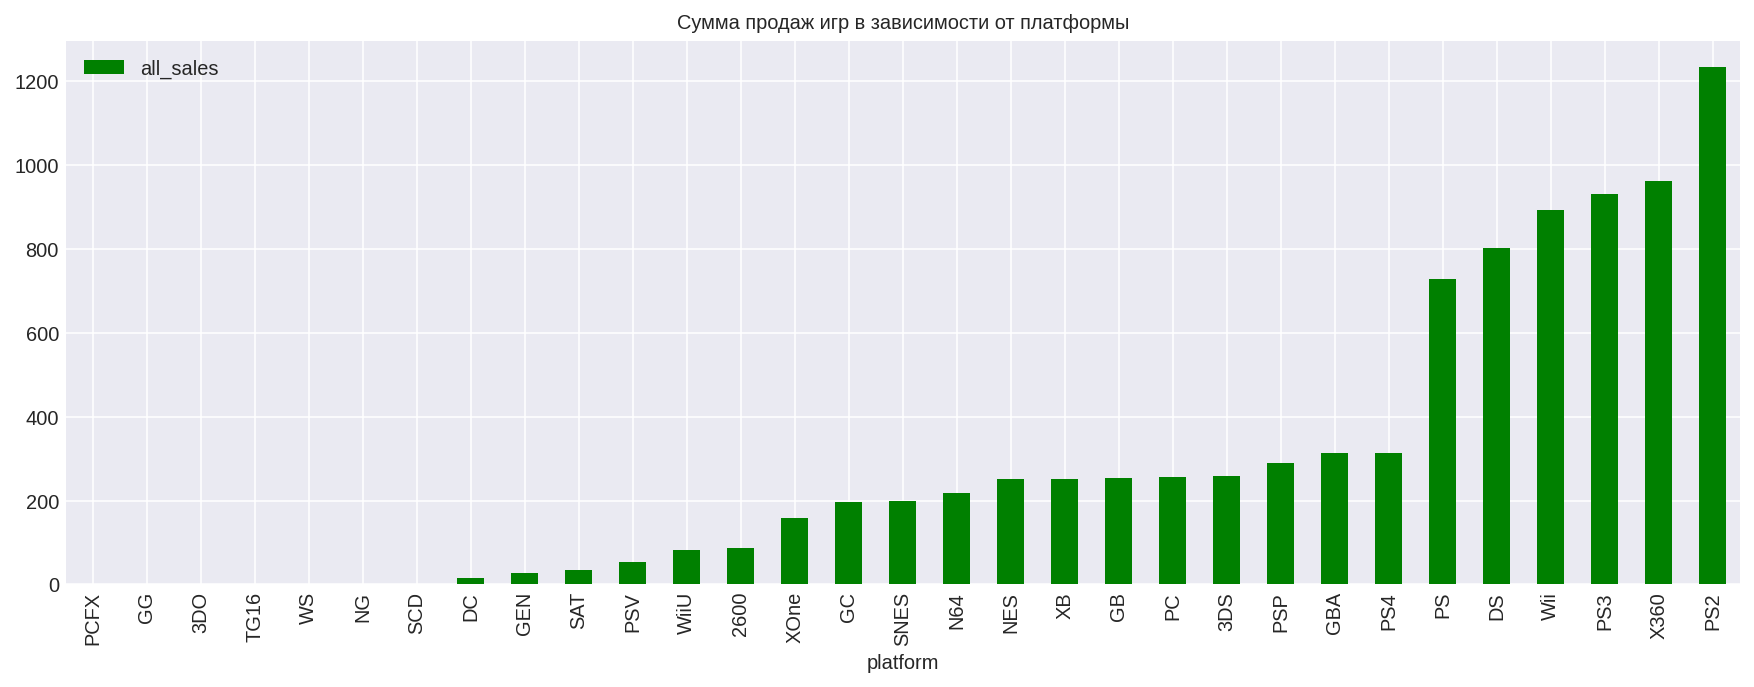

In [18]:
# делаем сводную таблицу платформ в зависимости от количества продаж, сортируем платформы в порядке возрастания
platform_sales = ((data.pivot_table(index='platform', values='all_sales', aggfunc='sum'))
                  .reset_index().sort_values(by='all_sales'))

# создаем столбчатую диаграмму
platform_sales.plot(kind='bar', y='all_sales', x='platform', figsize=(15,5), color='green')
plt.grid(which='major')
plt.title("Сумма продаж игр в зависимости от платформы", fontsize=10)
plt.show()

Основной доход приходится на платформы с продажами от 600 млн и больше, их видно на графике отдельно, они входят в топ всех платформ. Есть платформы со средним показателем продаж от 50 до 300 млн. Остальные совсем маленькие. 

Проверим в течении какого срока выпускались игры на самых топовых платформах:

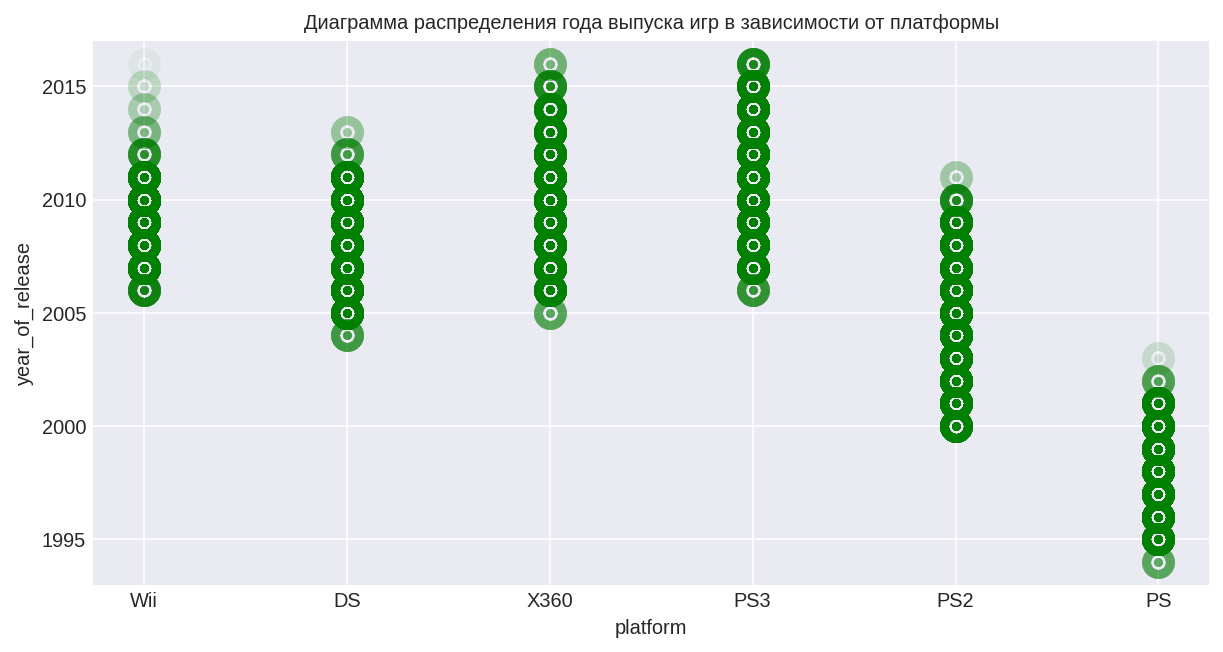

In [19]:
# выведем данные только по топовым платформам (от 600 млн в год)
platform_sales = (platform_sales.pivot_table(index='platform', values='all_sales', aggfunc='sum')
                  .nlargest(6, 'all_sales').reset_index())
# для удоства оставим только данные по платформам, уберем данные по цене
platform_sales = platform_sales['platform']
# сделаем срез данных из таблицы data только по топовым платформам, которые у нас есть в platform_sales_pl
platform_sales_top = data.query('platform in @platform_sales')

# построим диаграмму распределения годов выпуска игр в зависимости от платформы
platform_sales_top.plot(kind='scatter', x='platform', y='year_of_release', 
                         alpha=.05, linewidths=12, figsize=(10,5), color='green')

plt.title("Диаграмма распределения года выпуска игр в зависимости от платформы", fontsize=10)
plt.grid(which='major')
plt.ylim(1993, 2017)
plt.show()

Исходя из диаграммы видно, что время жизни платформы составляет примерно 10 лет. В большинстве своем после этого срока выход новых игр на них начинает затухать. 

Для анализа актуального периода и построения прогноза на 2017 год необходимо брать данные за последние максимум 5 лет. Возьмем данные после пика начиная с 2012 по 2016. В данные годы примерно одно количество продаж и выпущенных игр. 

In [20]:
# делаем срез данных только по данным после 1995 года, созраняем в data
data = data[data['year_of_release']>2012]

#### Исследование данных за актуальные период

Теперь когда мы выявили актуальный период, то проверим какие платформы у нас выйдут в топ по продажам:

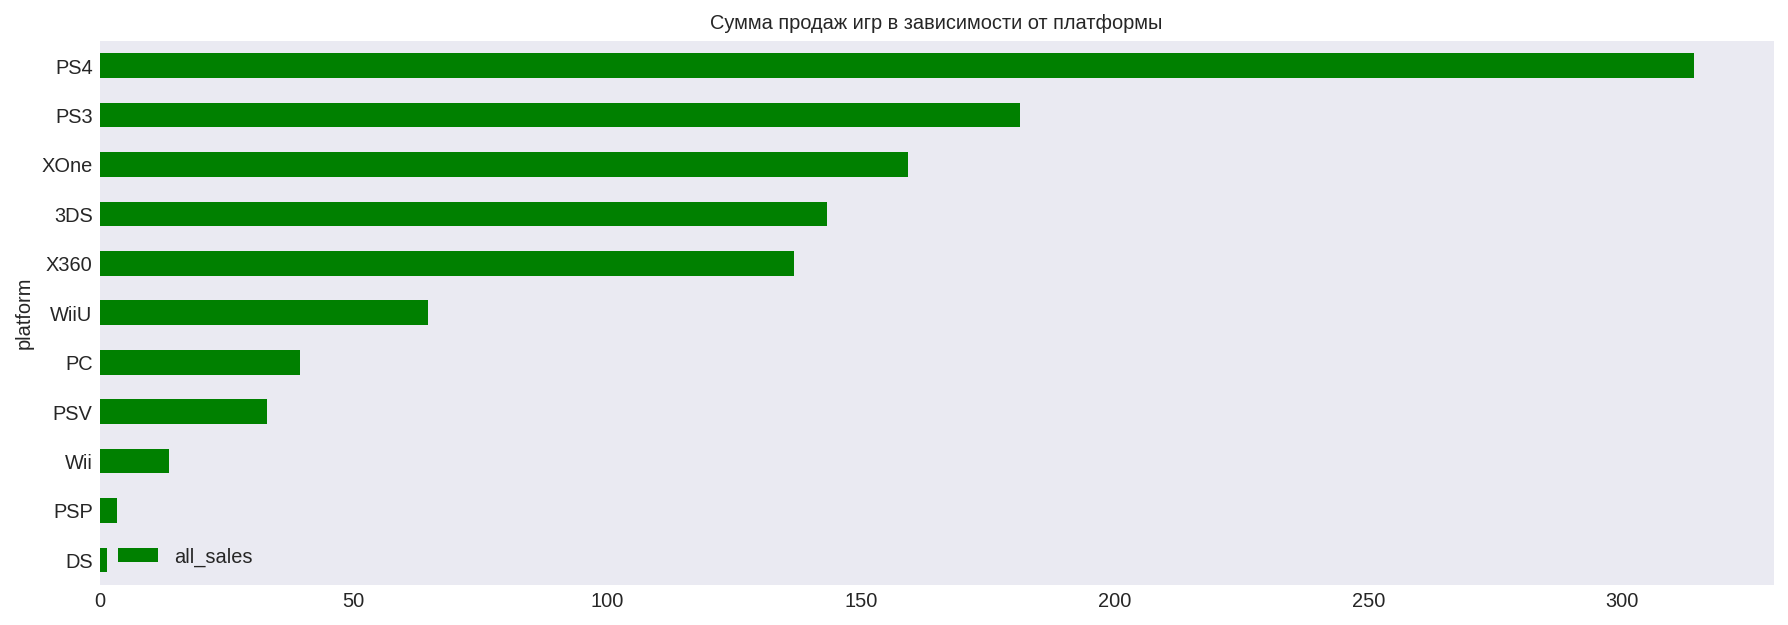

In [21]:
# делаем сводную таблицу платформ по актуальному периоду в зависимости от количества продаж
# сортируем платформы в порядке возрастания
platform_sales_act = ((data.pivot_table(index='platform', values='all_sales', aggfunc='sum'))
                  .reset_index().sort_values(by='all_sales'))

# создаем столбчатую диаграмму
platform_sales_act.plot(kind='barh', y='all_sales', x='platform', figsize=(15,5), color='green')
plt.title("Сумма продаж игр в зависимости от платформы", fontsize=10)
plt.show()

В актуальном периоде у нас лидирует 5 платформ: PS4, PS3, XOne, 3DS, X360. Только две из них были в топе, когда мы анализировали данные за все время. 

Проверим как меняются продажи по разным платформам в зависимости от года. Попытаемся предположить какие из них будут активных в 2017 году:

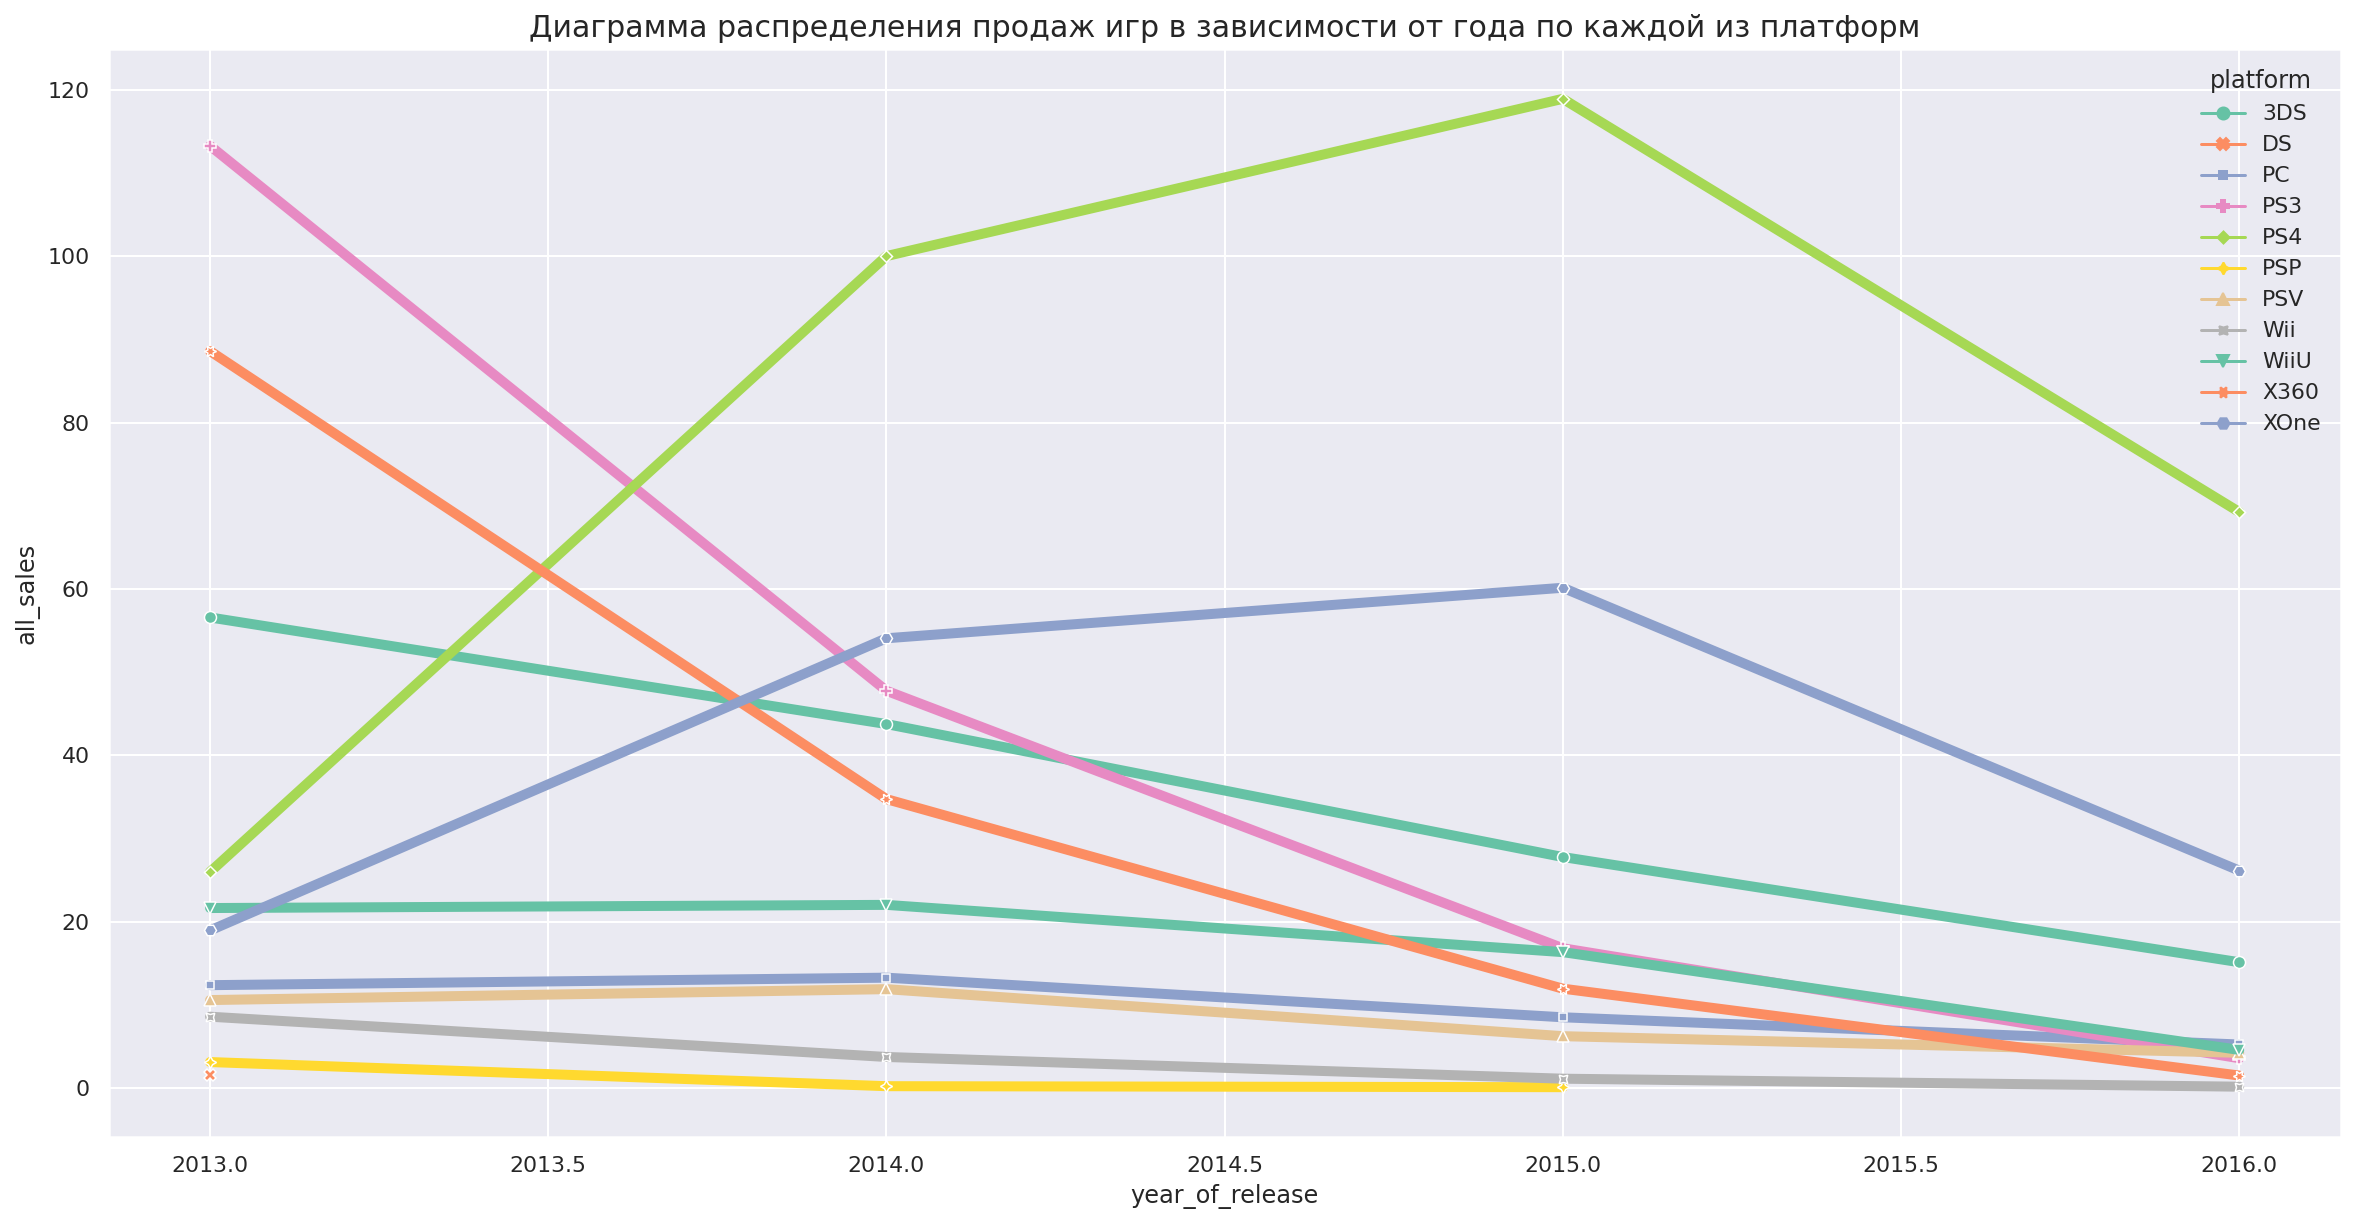

In [22]:
# группируем данные по году и платорме, считаем суммарные продажи в ниъ
data_progress = data.groupby(['year_of_release', 'platform'])['all_sales'].sum().reset_index()

# строим линейную диаграммы зависимости продаж от года по каждой из платформ
sns.set(rc={'figure.figsize':(20, 10)})
sns.lineplot(data=data_progress, x="year_of_release", y="all_sales", hue="platform", style="platform", 
             markers=True, dashes=False, lw = 5, palette="Set2")

plt.title("Диаграмма распределения продаж игр в зависимости от года по каждой из платформ", fontsize=15)
plt.show()

Похоже, что продажи по всем платформам несколько падают. Учтем, что, согласно документации, данные за 2016 год у нас не полные. С учетом этого можно предположить, что высокие продажи будут по платформам PS4, XOne. Платформа 3DS также может рассматриваться как перспективная. Хотя продажи по ней падают, но относительно остальных платформ, продажи по которым упали совсем низко, она в целом показывает неплохие результаты.

Построим диаграммы типа "ящик с усами" по глобальным продажам игр в разбивке по платформам и жанрам:

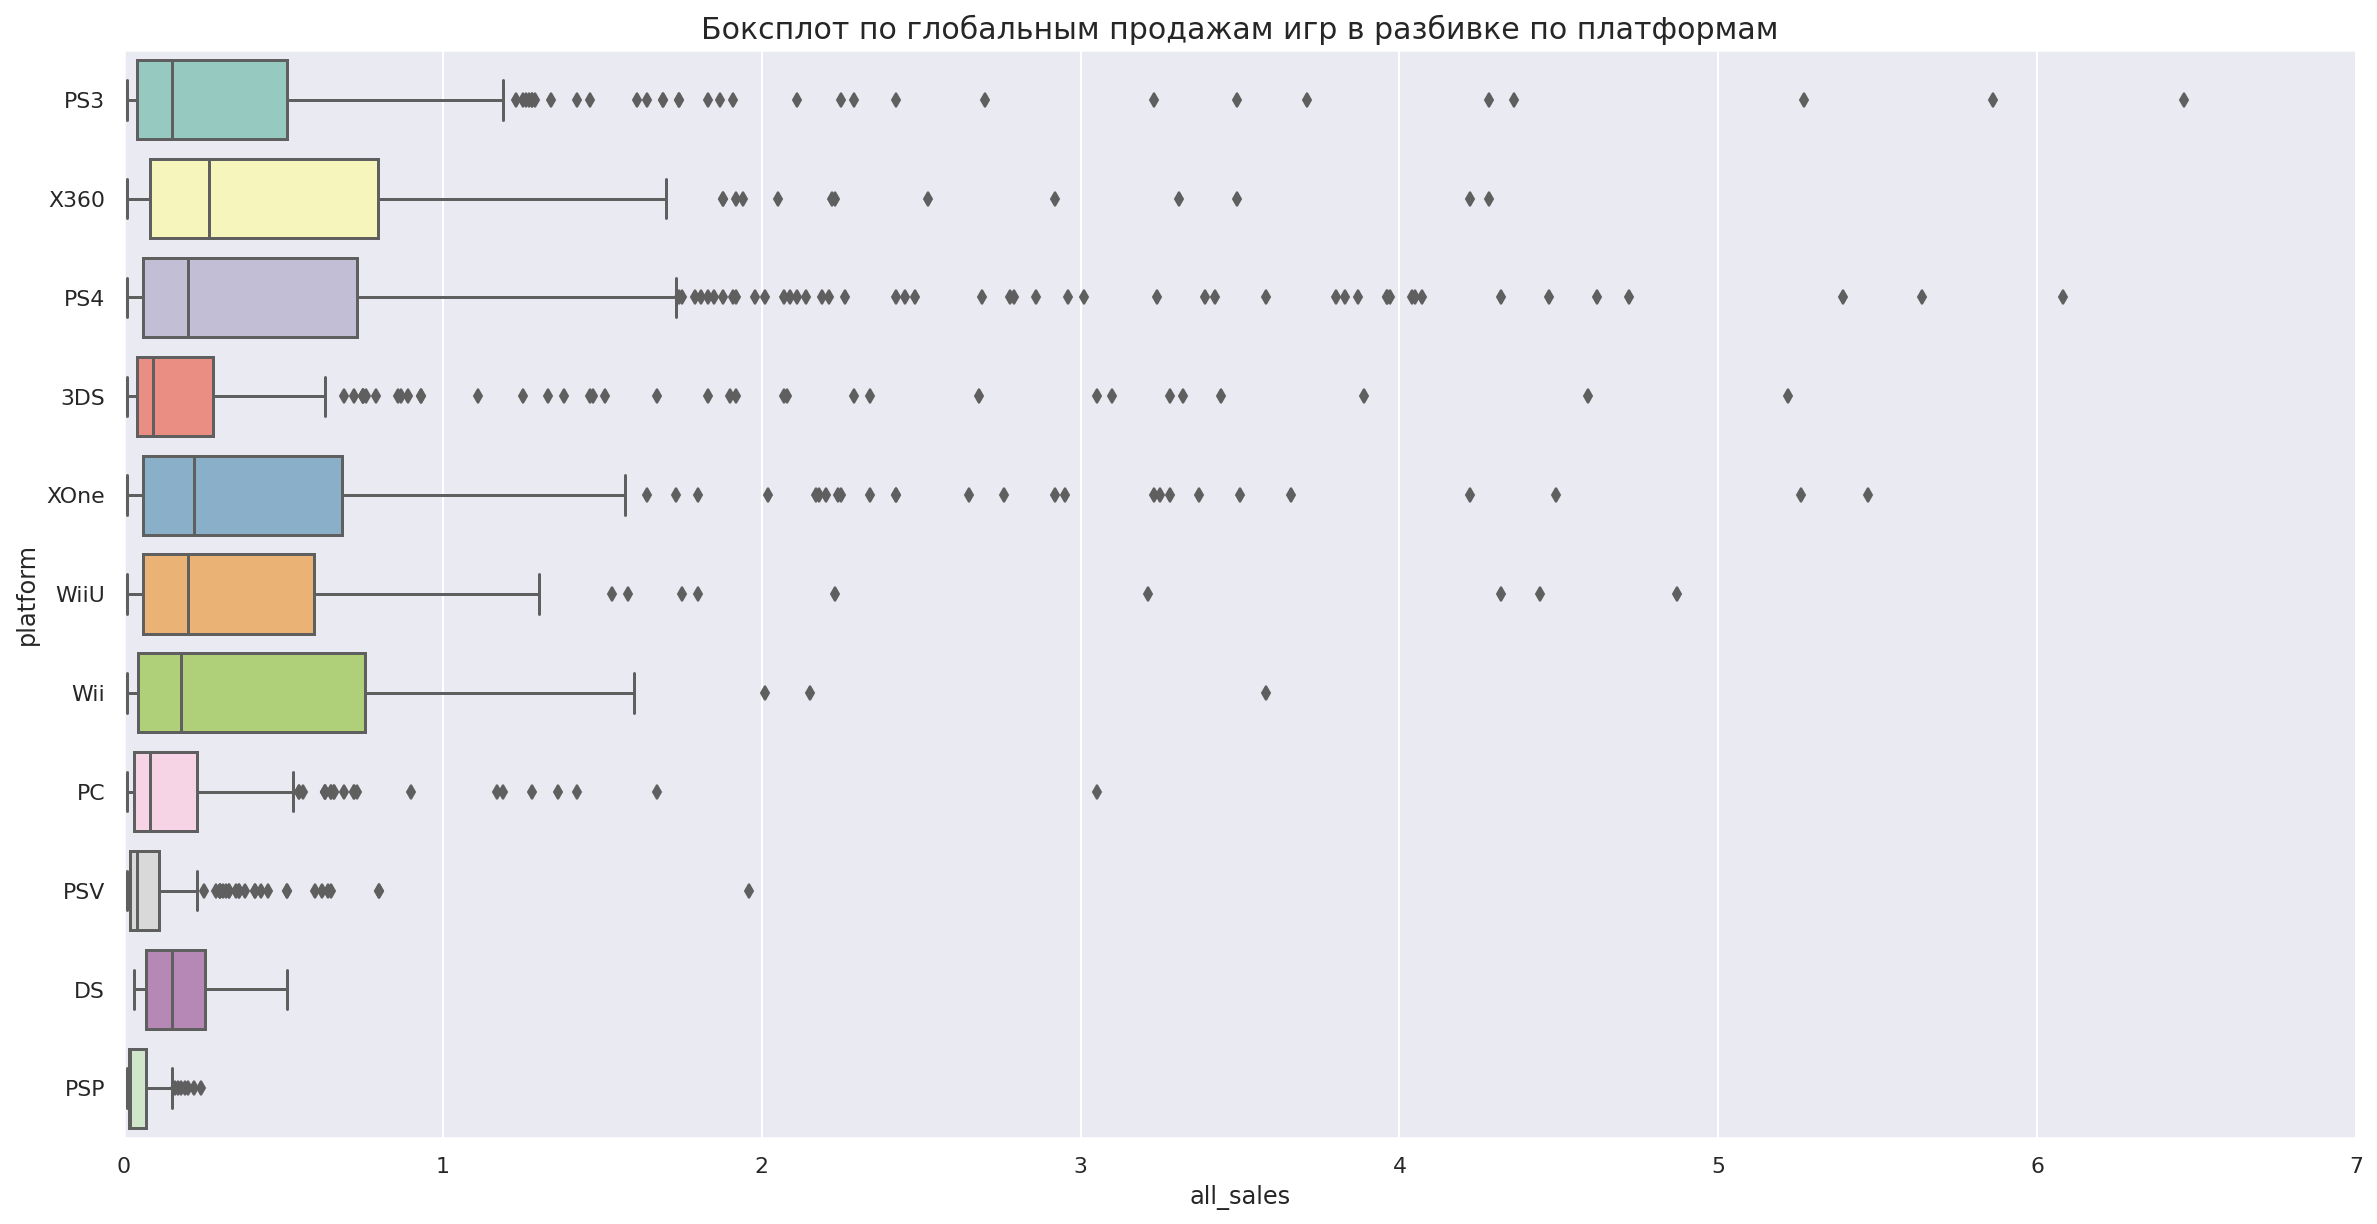

In [23]:
# строим диаграмму boxplot по глобальным продажам игр в разбивке по площадкам
plt.figure(figsize=(20,10))
sns.boxplot(y="platform", x="all_sales", data=data, palette="Set3")

plt.xlim(0,7)
plt.title("Боксплот по глобальным продажам игр в разбивке по платформам", fontsize=15)
plt.show()

Особенно хорошо видны те самые 5 площадок с самыми большими продажами.
Интересно тут выглядит PS4. Хотя ее медианное значение ниже, чем у остальных игр в топе, зато у нее самое большое количество выбросов. 

У PS3 примерно такая же ситуация, как у PS4. Медианное значение ниже, чем у остальных игр в топе, но большой разброс значений и много выбросов.

Хорошие медианные значения продаж у XOne, X360, WiiU и Wii.

3DS имеет меньший разброс и ниже медиану относительно других анализируемых площадок. Однако имеет достаточно выбросов с более дорогими продажами. 

#### Выявления влияния оценок пользователей и критиков на продажи

Рассмотрим, как влияют оценки критиков и пользователей на продажи на площадке. Для этого возьмем наиболее топовую и перспективную по продажам площадку - PS4.

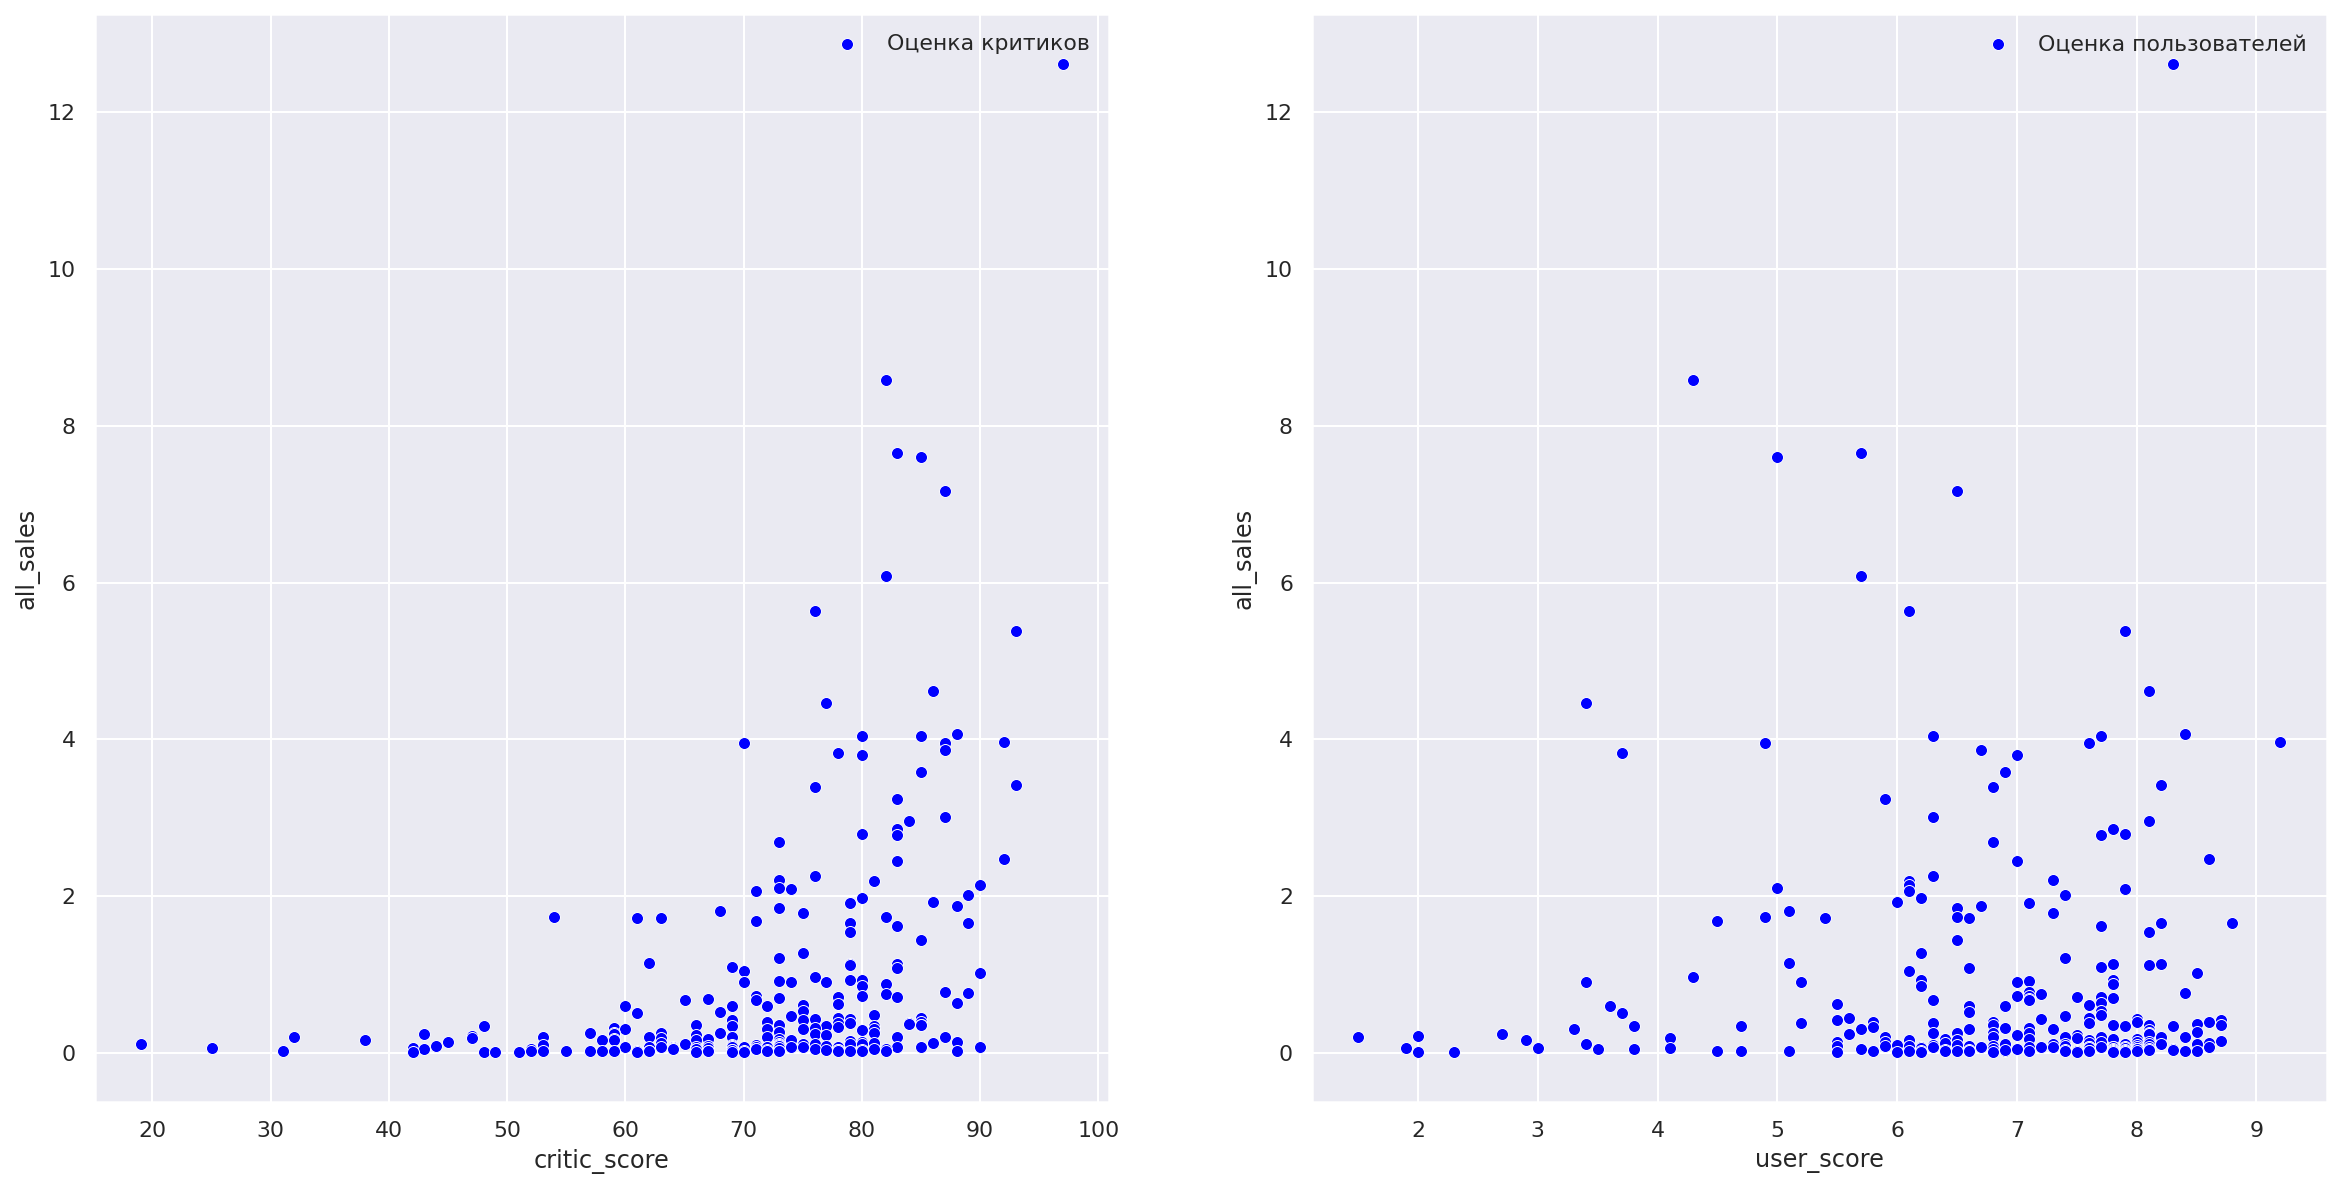

In [24]:
# делаем срез таблицы по платформе PS2
ps4 = data[data['platform'] == 'PS4']
ps4 = ps4[['critic_score', 'user_score', 'all_sales']]

# строим диаграмму рассеяния по оценкам критиков и юзеров
sns.scatterplot(data=ps4, y="all_sales", x="critic_score", color='blue', label='Оценка критиков', ax = plt.subplot(1,2,1))
sns.scatterplot(data=ps4, y="all_sales", x="user_score", color='blue', label='Оценка пользователей', ax = plt.subplot(1,2,2))

plt.show()

In [25]:
ps4.corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
all_sales,0.406568,-0.031957,1.000000


В случае с оценками пользователей мы видим отрицательную корреляцию, в случае с критиками по этой платформе она составляет только 40%.

Проверим данные по другим платформам из нашего топа по продажам:


3DS


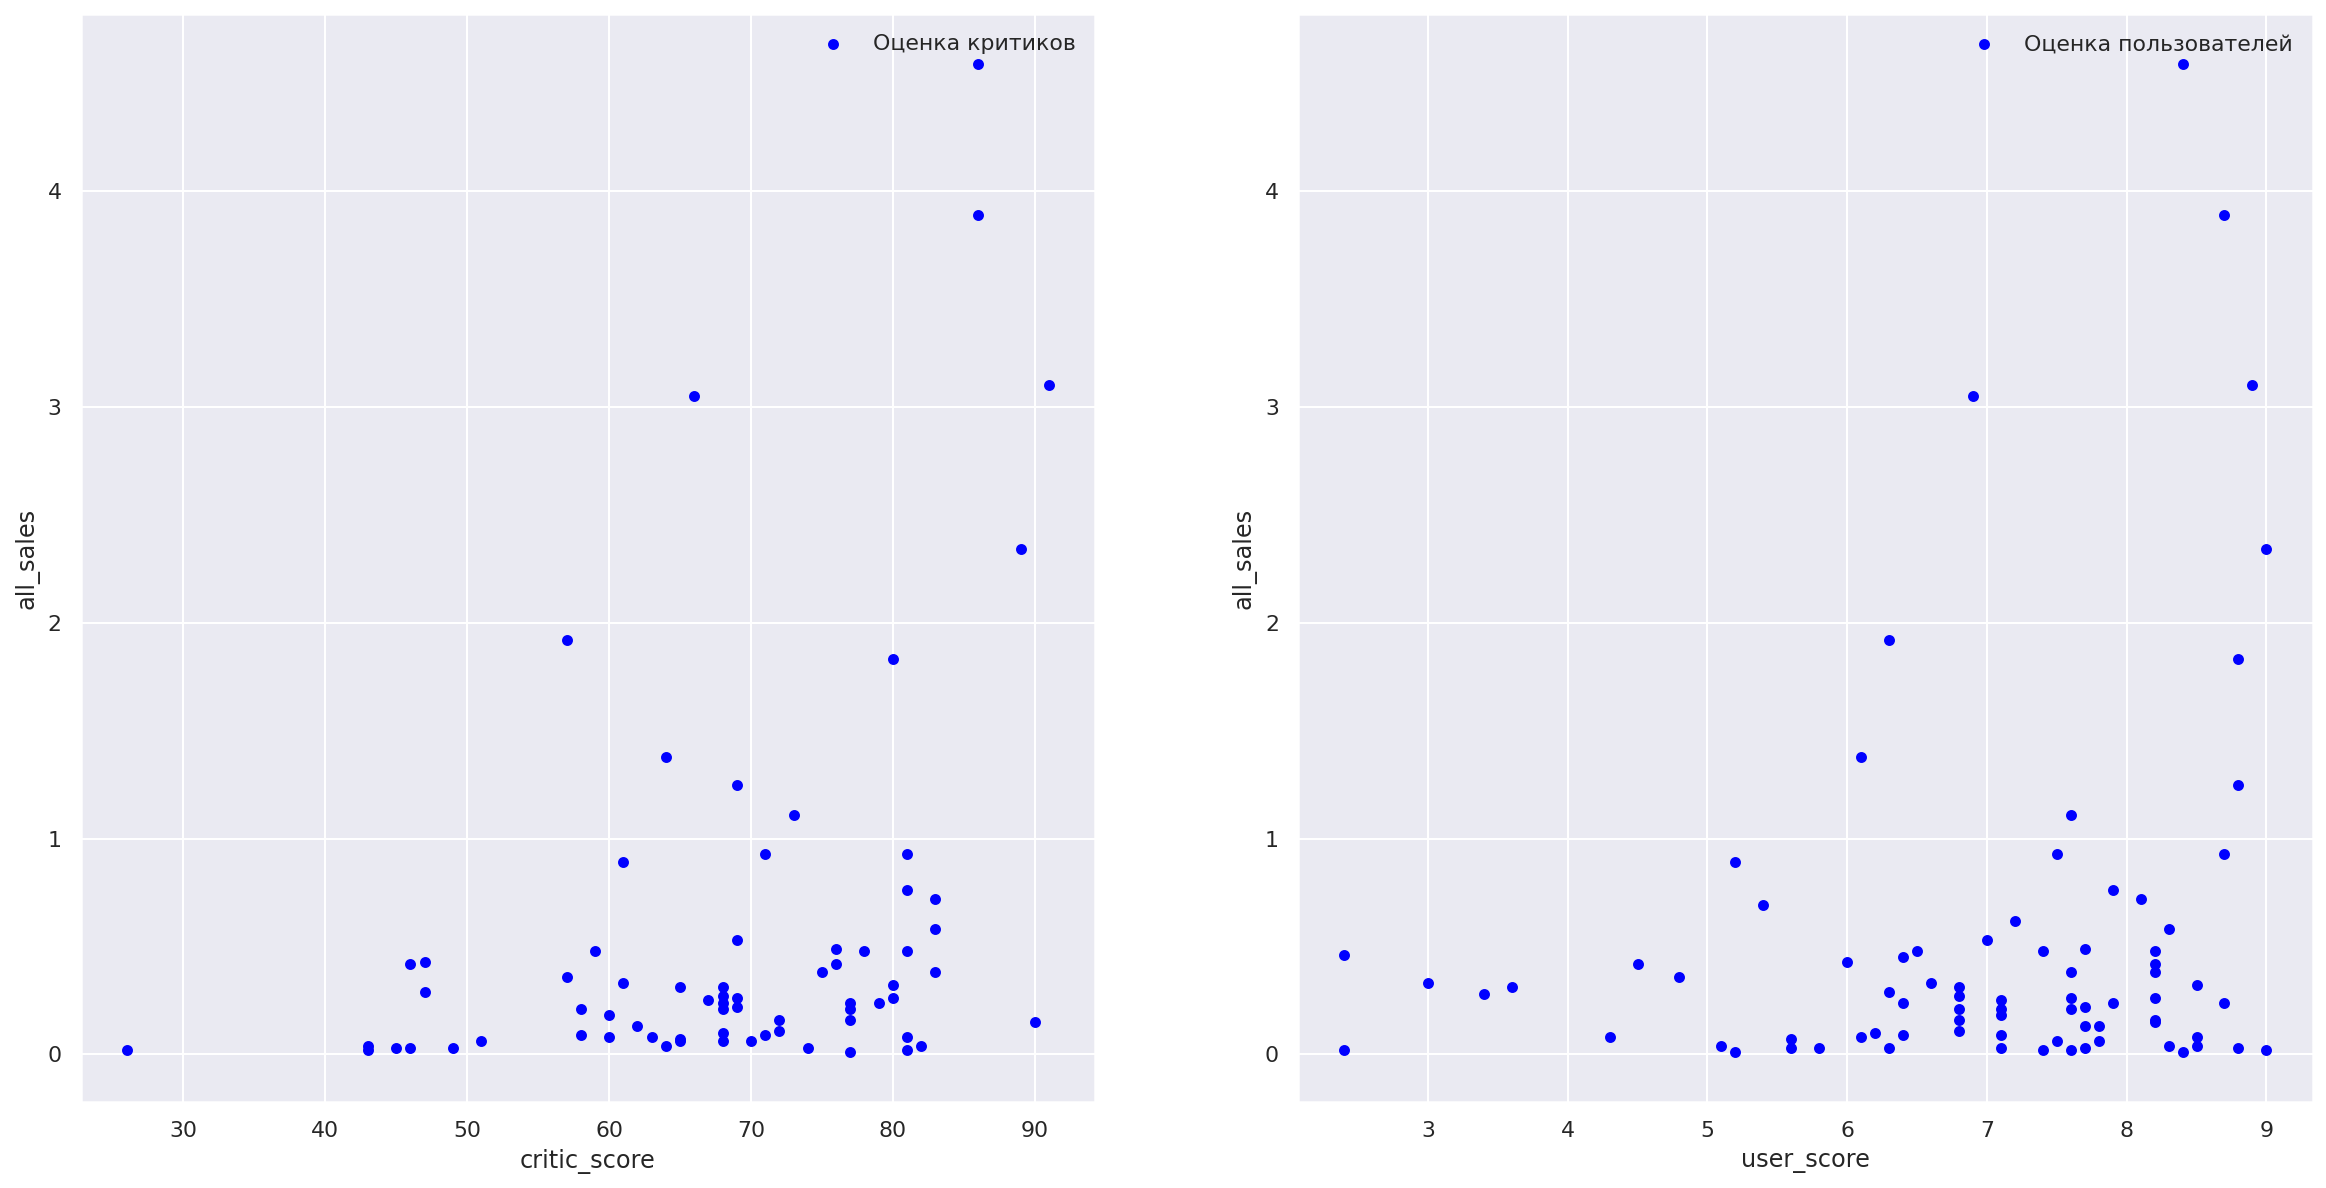

critic_score    0.357057
user_score      0.241504
all_sales       1.000000
Name: all_sales, dtype: float64

PS3


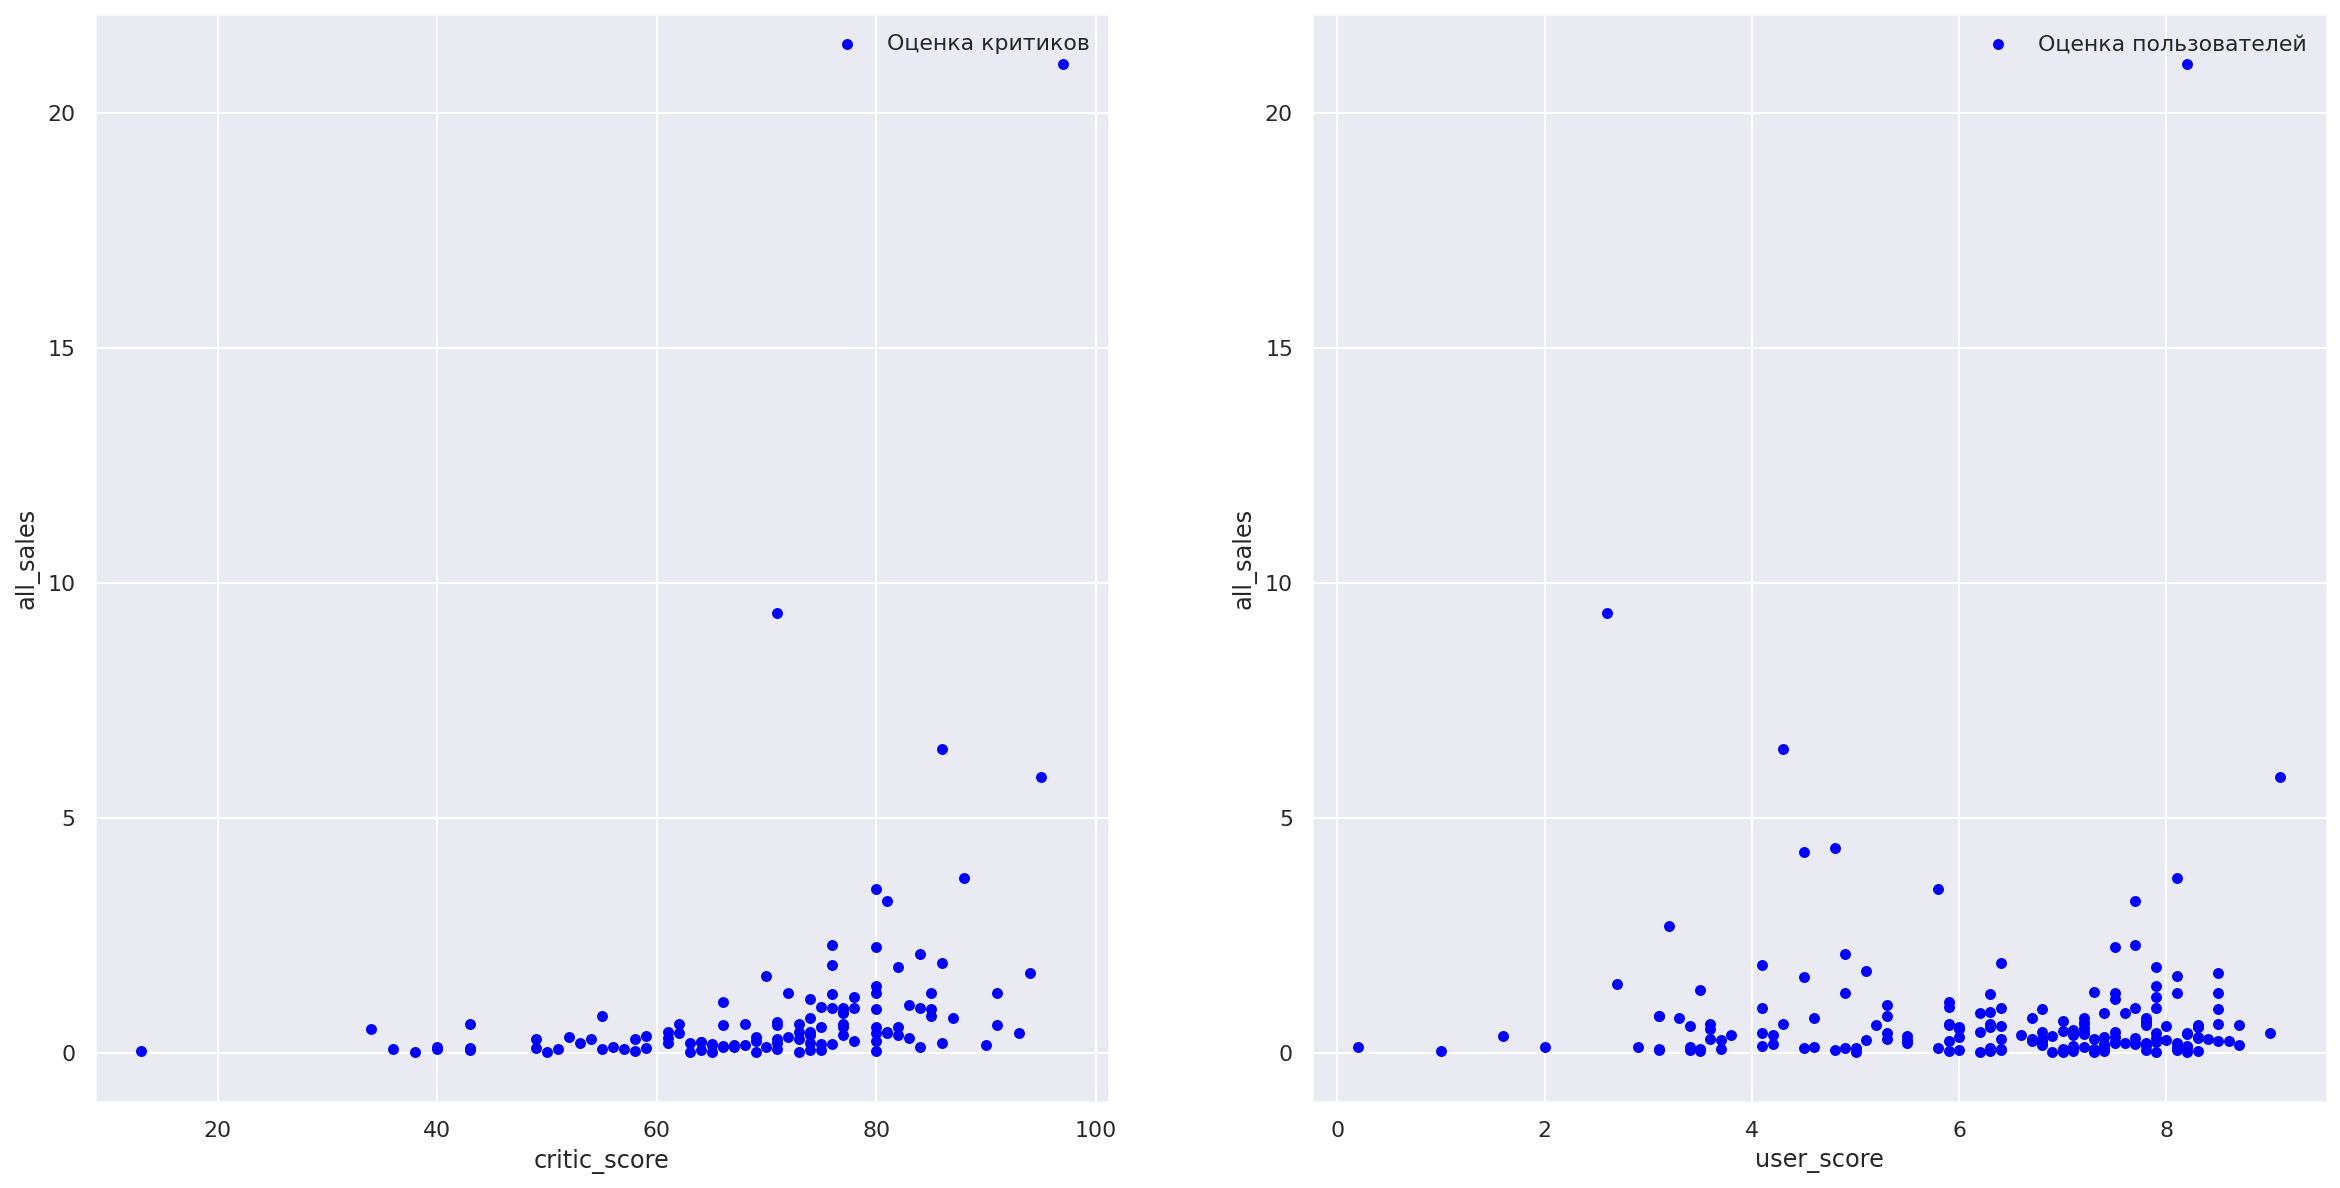

critic_score    0.334285
user_score      0.002394
all_sales       1.000000
Name: all_sales, dtype: float64

X360


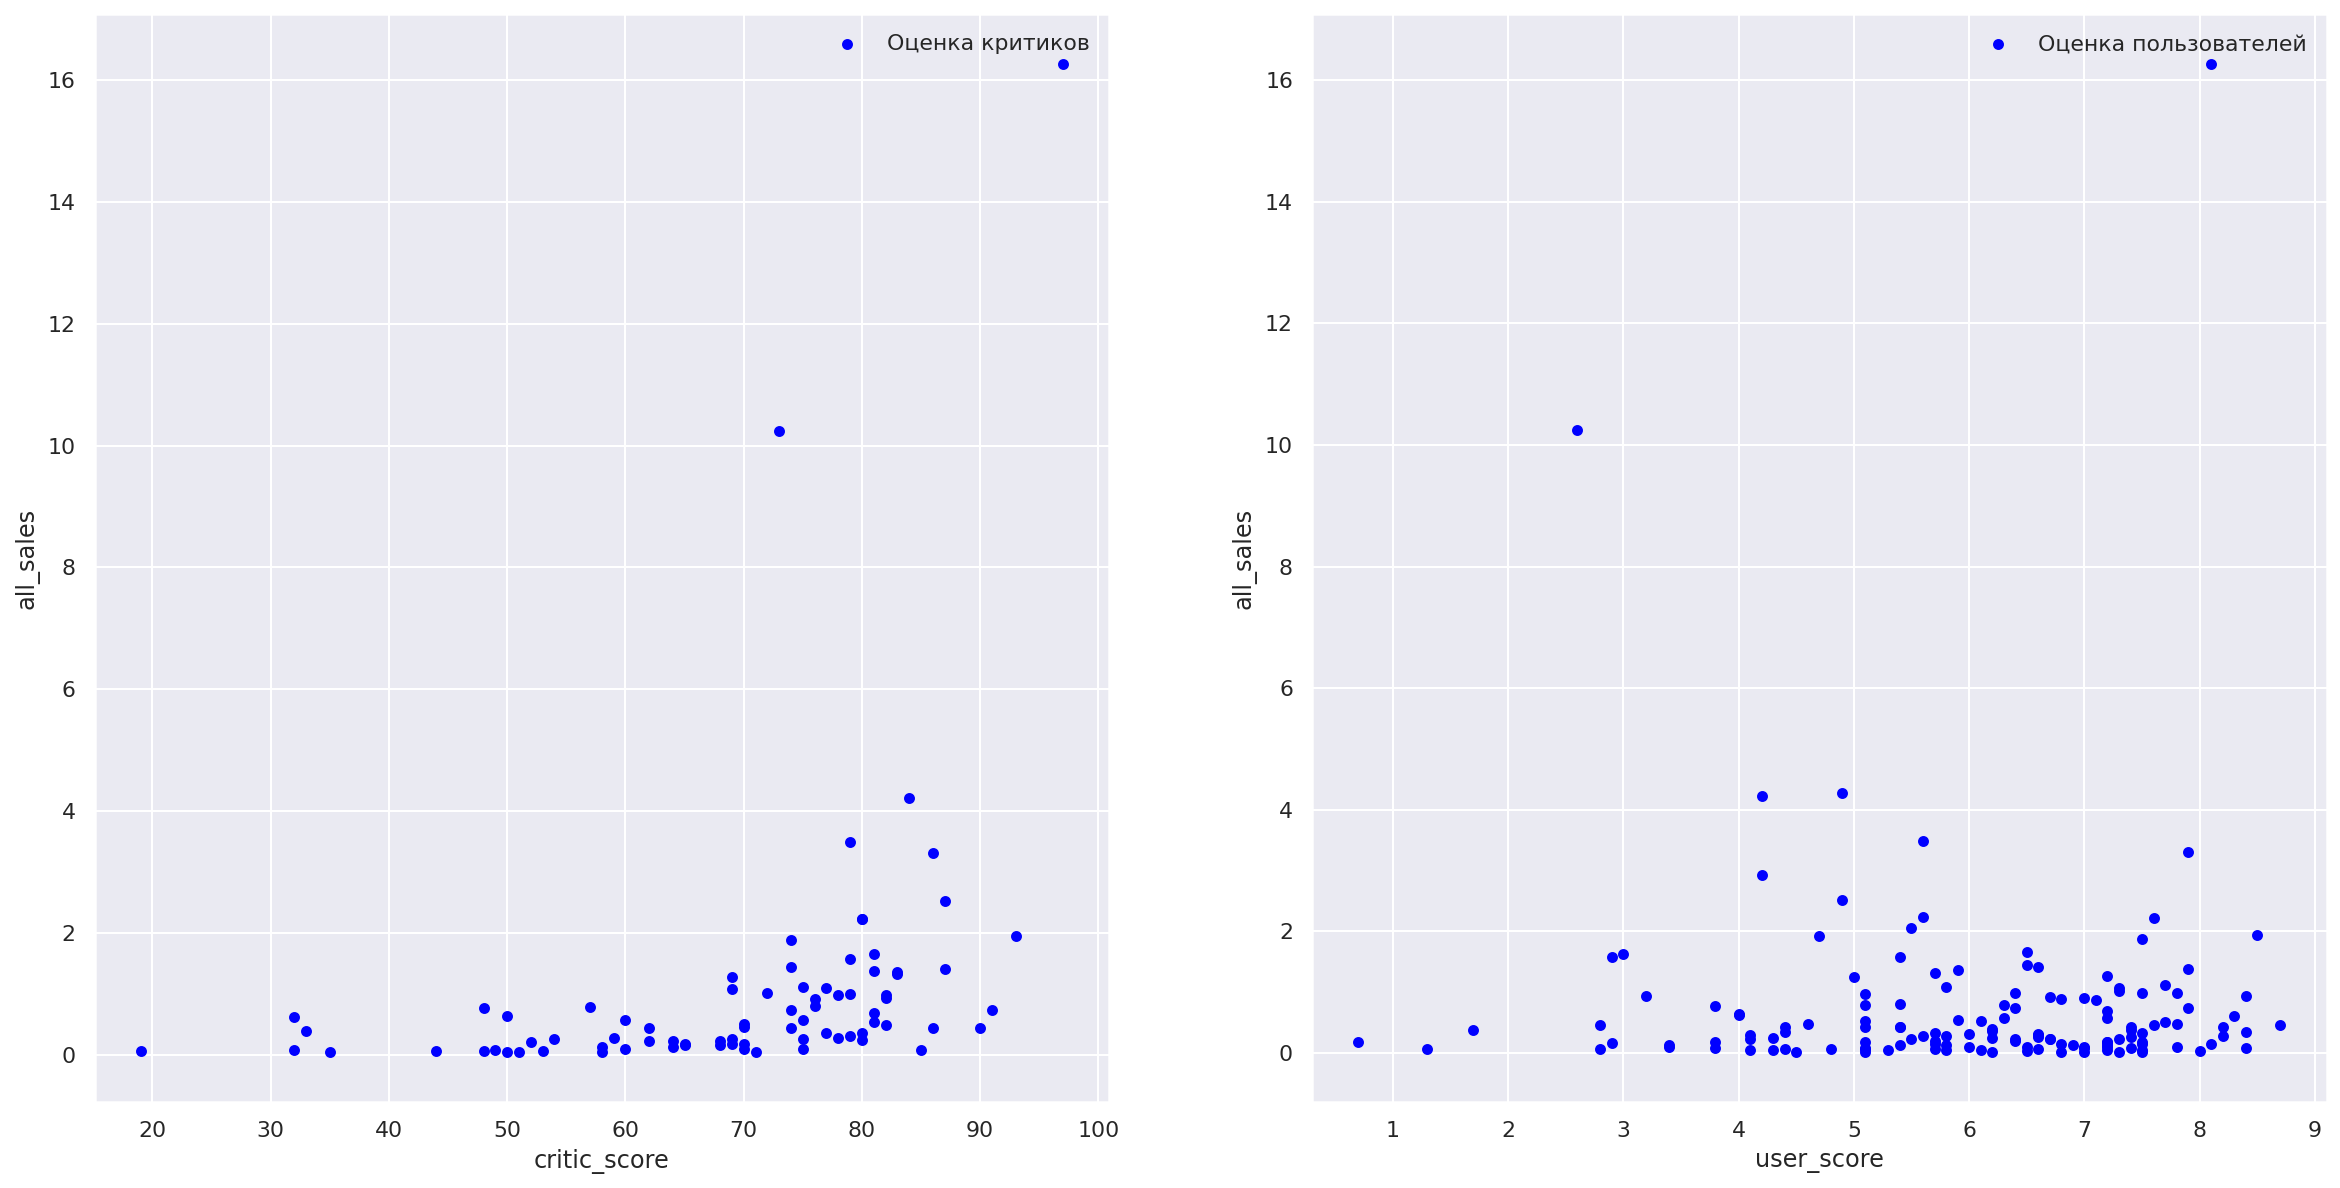

critic_score    0.350345
user_score     -0.011742
all_sales       1.000000
Name: all_sales, dtype: float64

XOne


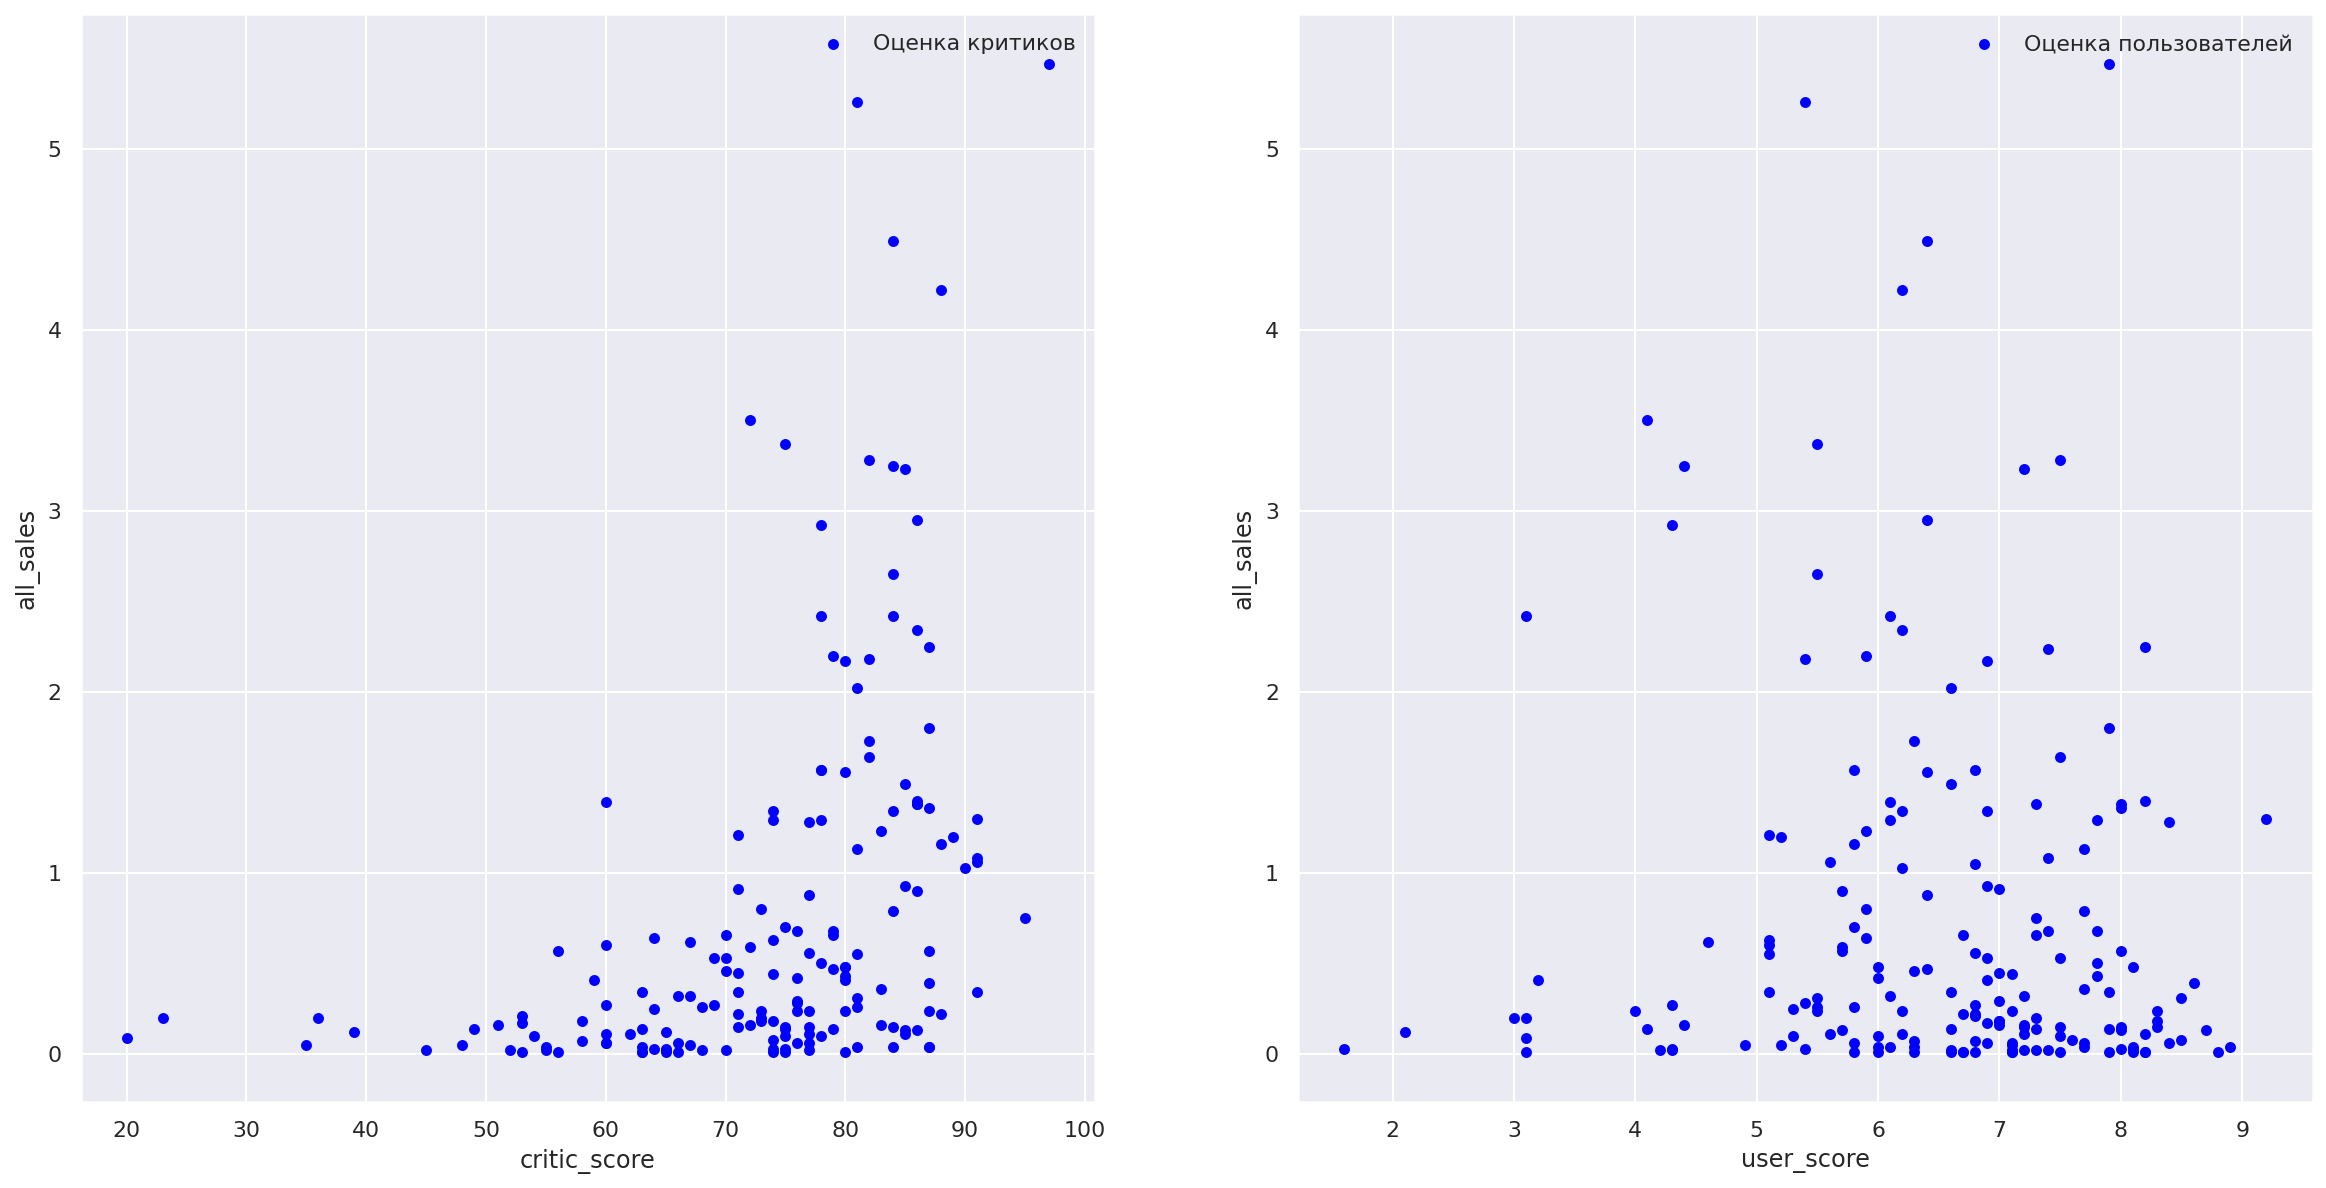

critic_score    0.416998
user_score     -0.068925
all_sales       1.000000
Name: all_sales, dtype: float64


In [26]:
# выделаем 4 топовых платформы для того, чтобы построить по ним график
data_top = data.query('platform in ("PS3", "XOne", "3DS", "X360")')

# группируем данные в таблице по платформам и для каждой из них строим график зависимости продаж от оценок критиков
# и оценок пользователей
# выводим данные по корреляции этих показателей от продаж на этой платформе
for platform, platform_in_top in data_top.groupby('platform'):
    print()
    print(platform)
    platform_in_top.plot(kind='scatter', x='critic_score', y='all_sales', color='blue', label='Оценка критиков',
                         ax = plt.subplot(1,2,1))
    platform_in_top.plot(kind='scatter', x='user_score', y='all_sales', color= 'blue', label='Оценка пользователей',
                         ax = plt.subplot(1,2,2))
    plt.show()
    print(platform_in_top[['critic_score', 'user_score', 'all_sales']].corr()['all_sales'])

Линейной корреляции между продажей игр и оценками пользователей\критиков практически нет. Это видно по всем самым топовым по продажам платформам.

#### Исследование наиболее популярных жанров

Проверим какие жанры показывают наибольшую популярность у пользователей в актуальный период:

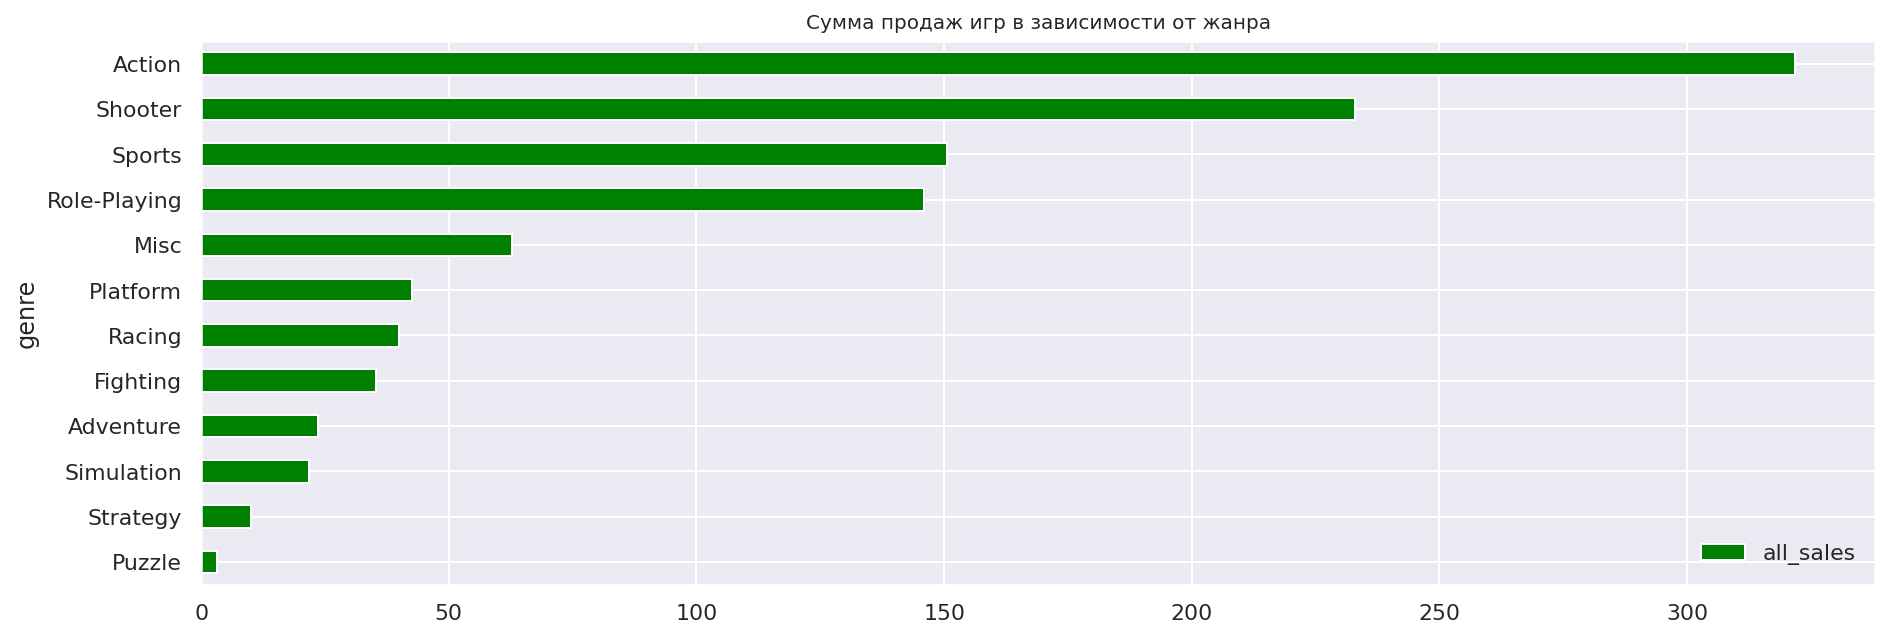

In [27]:
# группируем данные по жанру игры, рассчитываем суммарные продажи по каждому жанру
data_genre_sum = ((data.pivot_table(index='genre', values='all_sales', aggfunc='sum'))
                  .reset_index().sort_values(by='all_sales'))

# строим столбчатую диаграмму зависимости продаж игры от ее жанра
data_genre_sum.plot(kind='barh', y='all_sales', x='genre', figsize=(15,5), color='green')
plt.title("Сумма продаж игр в зависимости от жанра", fontsize=10)
plt.show()

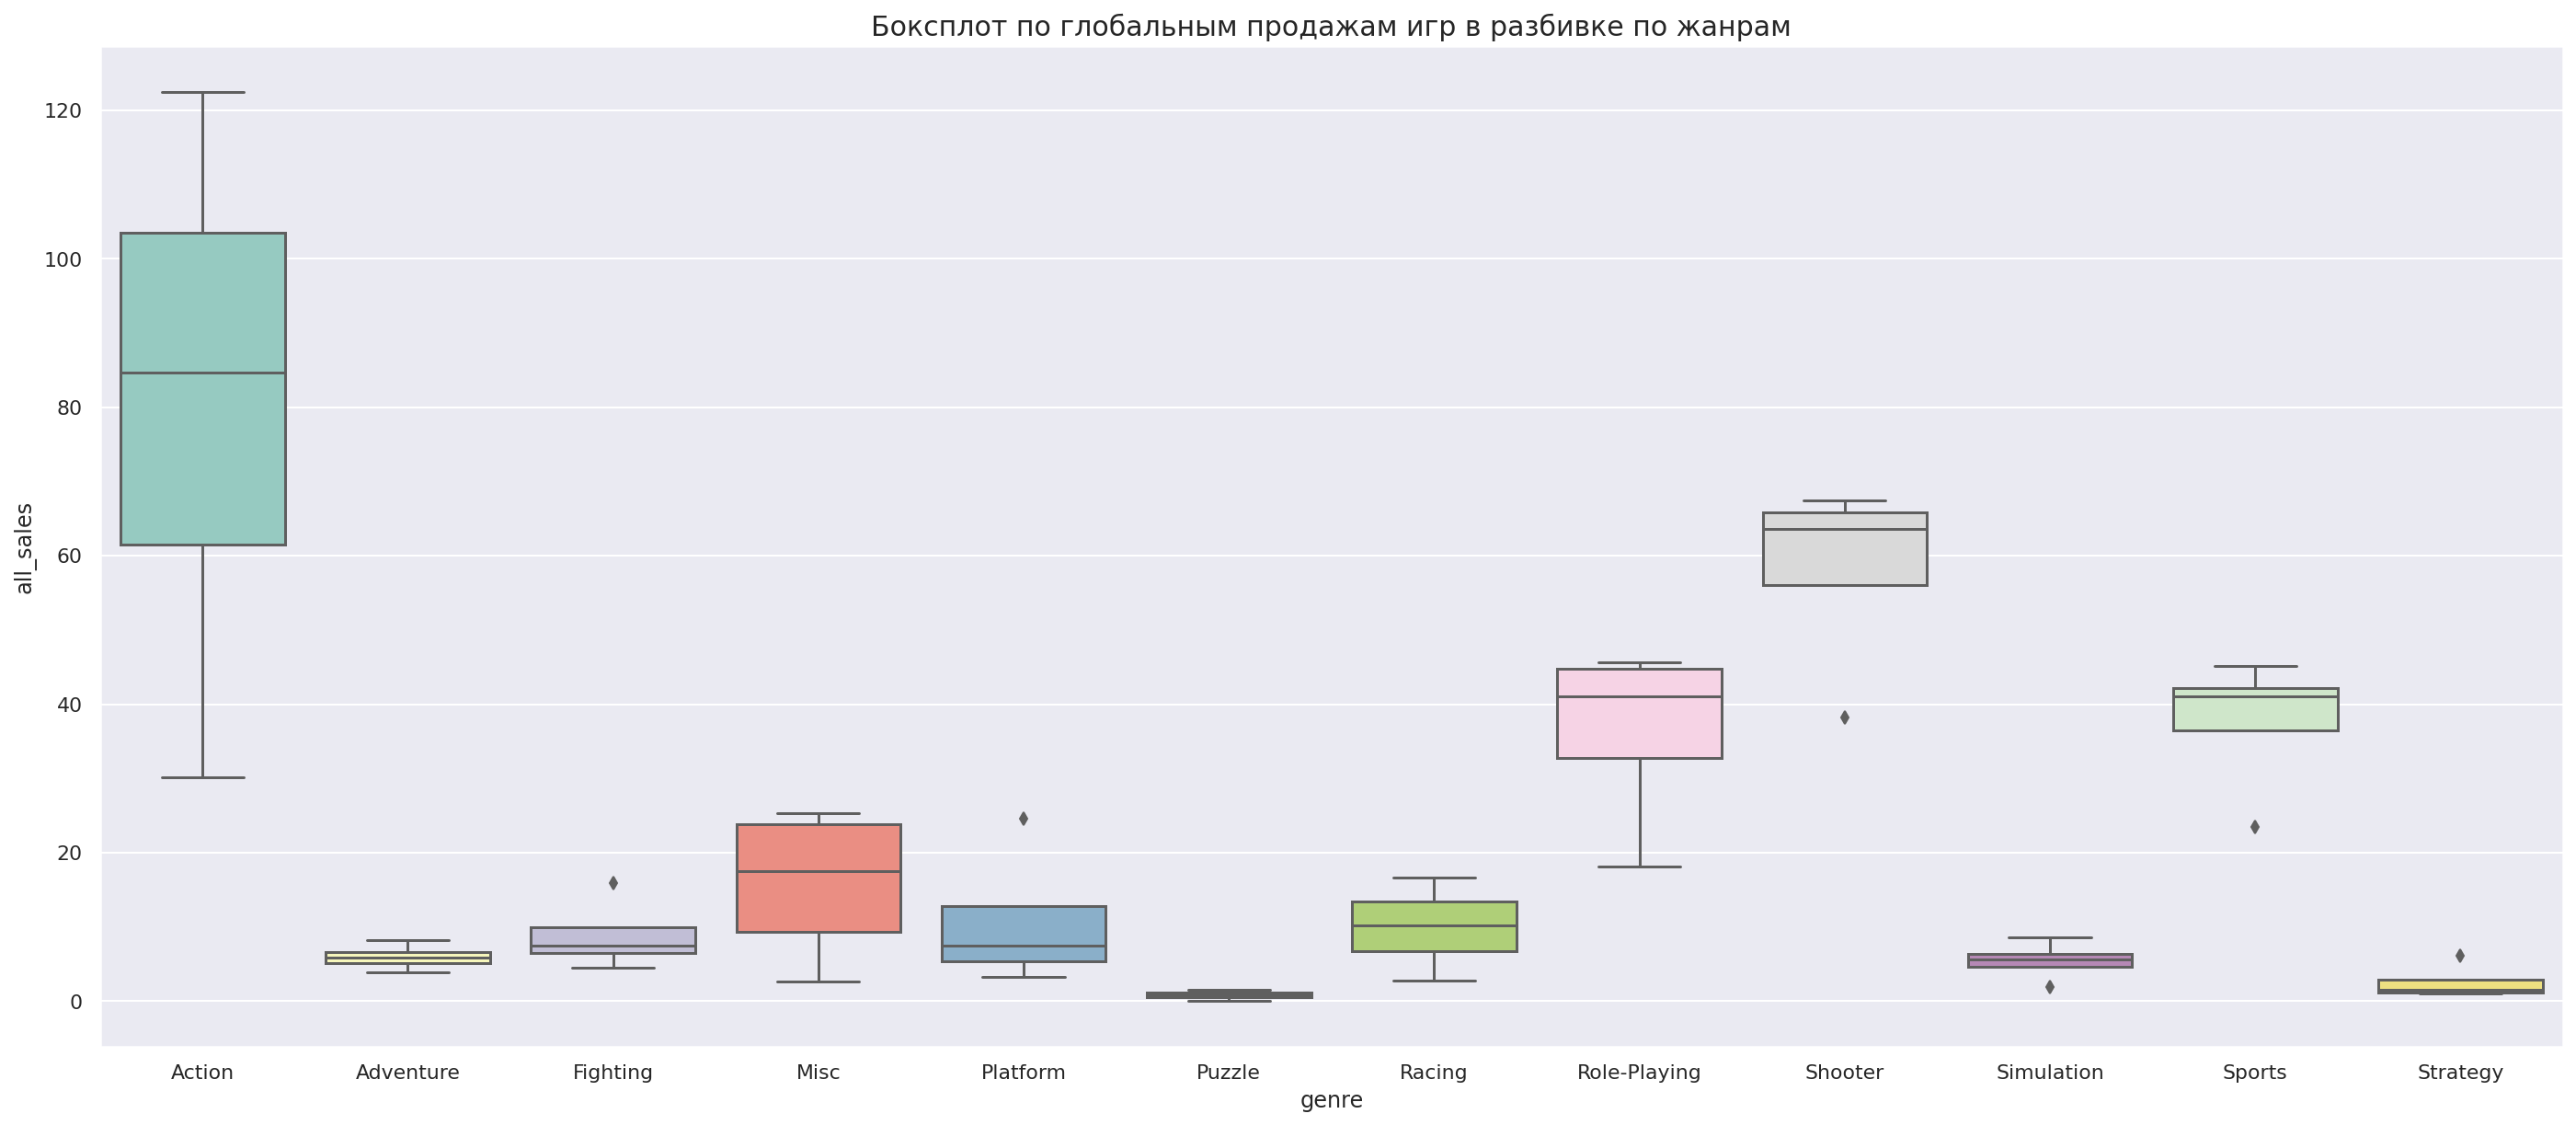

In [28]:
# строим диаграмму boxplot по жанрам игр в разбивке по площадкам
data_g_sum = data.groupby(['year_of_release', 'genre'])['all_sales'].sum().reset_index()

plt.figure(figsize=(24,10))
sns.boxplot(x="genre", y="all_sales", data=data_g_sum, palette="Set3")

plt.title("Боксплот по глобальным продажам игр в разбивке по жанрам", fontsize=15)

plt.show()

По глобальным продажам наибольшей популярностью пользуются игры в жанрах Action, Shooter, Sports и Role-Playing. Реже всего пользователи покупают игры в жанрах Puzzie и Strategy.

Распределение по жанрам выглядит интересно. Особенно выделяются игры в жанре Action. У них самое большое распределение и самое высокое медианное значение стоимости. 
Относительно медианного значения стоимости весьма высоко показали себя Shooter, чуть ниже Role-Playing, затем идут игры в жанре Sports (у них высокое медианное значение, но распределение не слишком велико), и завершает нашу пятерку жанр Misc.

Однако на общее количество продаж может влиять также количество выпускаемых игр в данном жанре. Проверим это, посмотрим по каким жанрам самые высокие средние продажи:

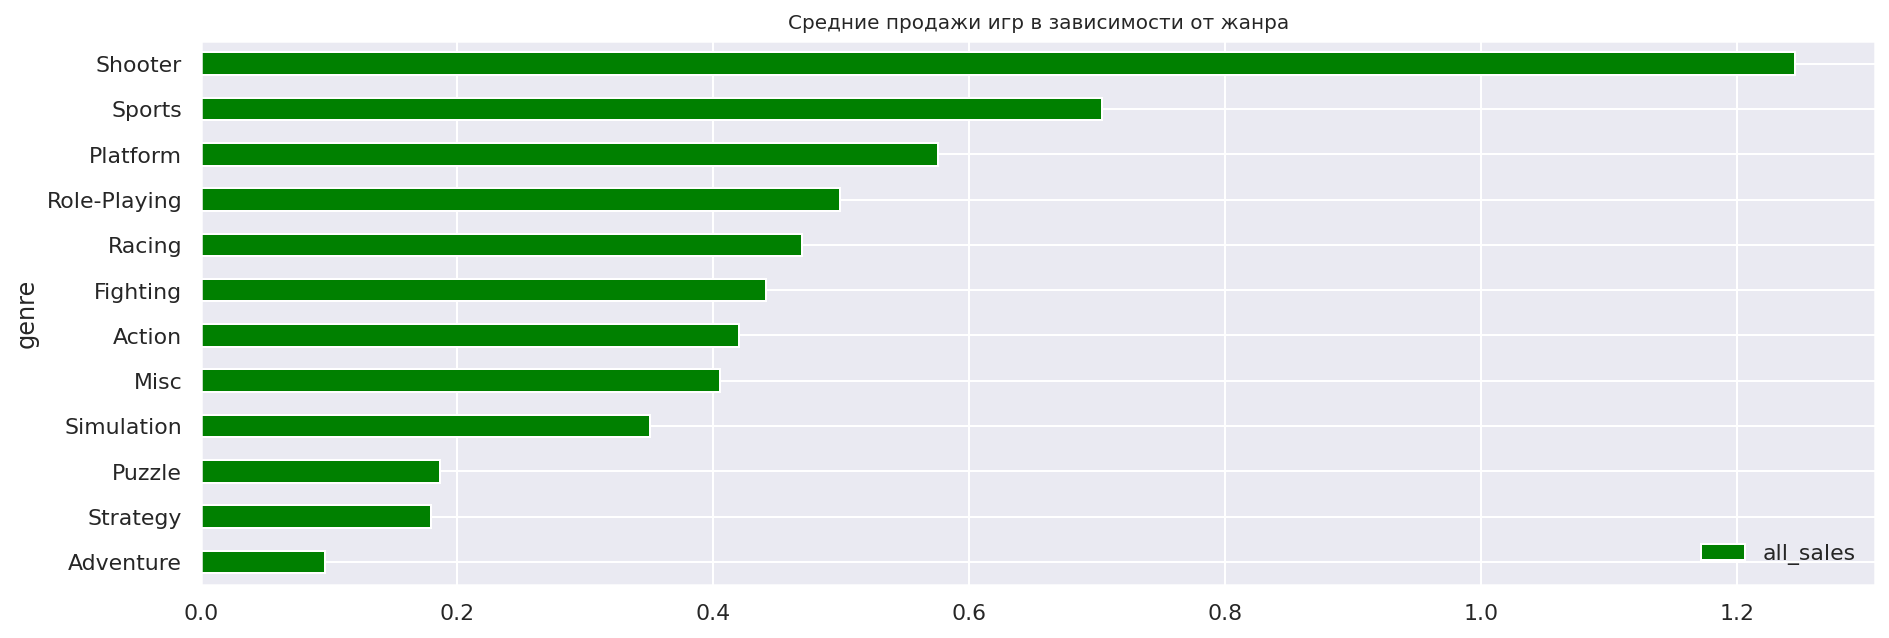

In [29]:
# группируем данные по жанру игры, рассчитываем средние продажи по каждому жанру
data_genre_mean = ((data.pivot_table(index='genre', values='all_sales'))
                  .reset_index().sort_values(by='all_sales'))

# строим столбчатую диаграмму зависимости продаж игры от ее жанра
data_genre_mean.plot(kind='barh', y='all_sales', x='genre', figsize=(15,5), color='green')
plt.title("Средние продажи игр в зависимости от жанра", fontsize=10)
plt.show()

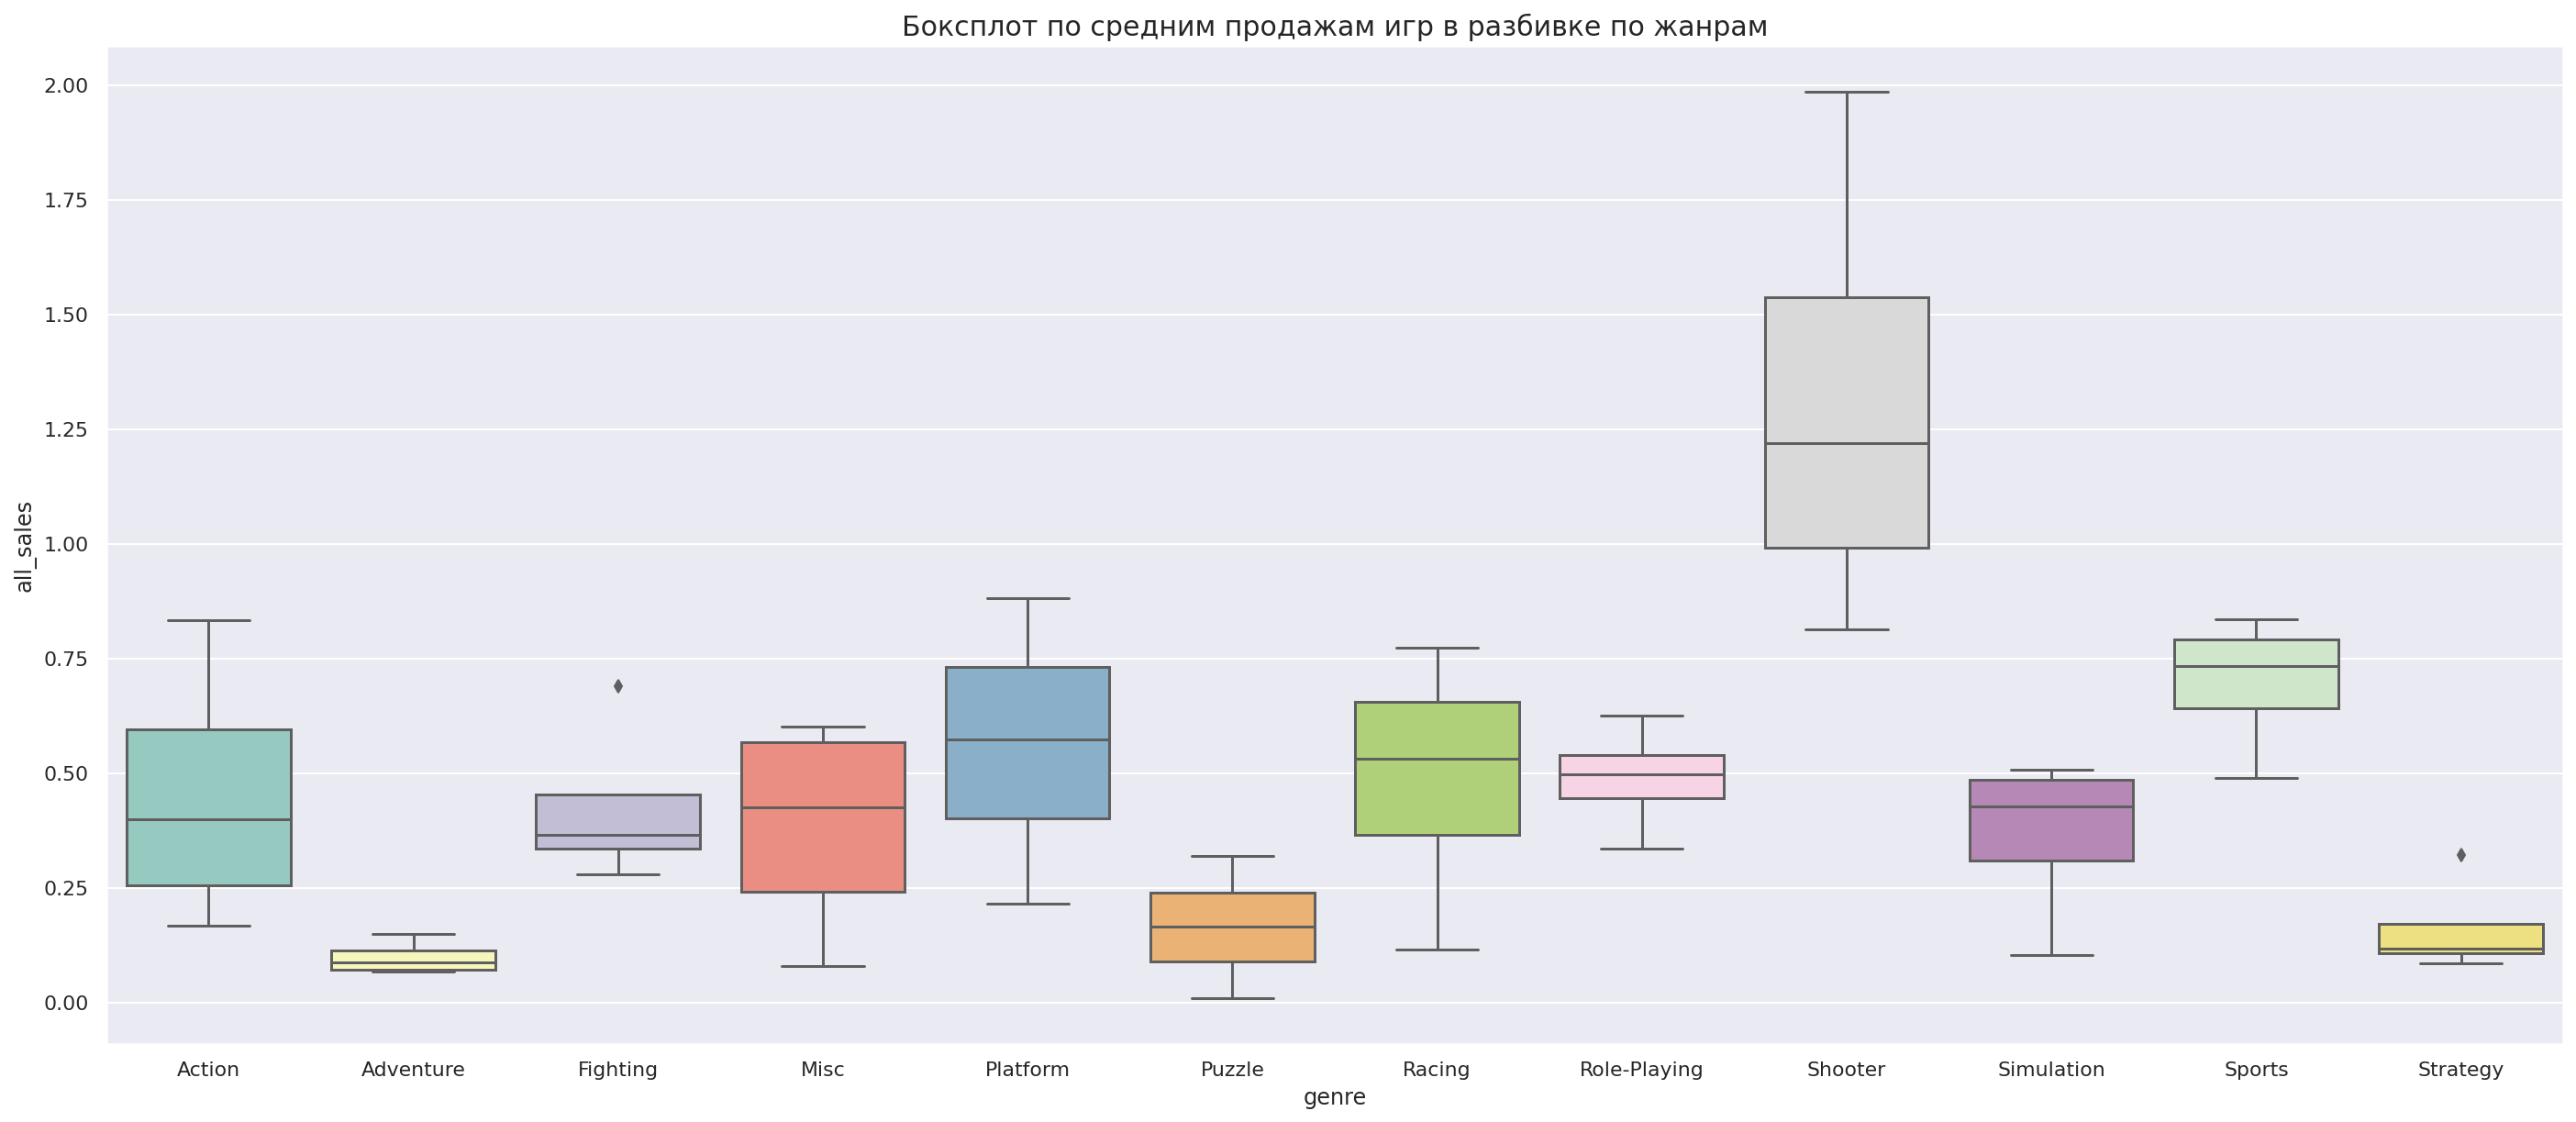

In [30]:
# строим диаграмму boxplot по жанрам игр в разбивке по площадкам
data_g_mean = data.groupby(['year_of_release', 'genre'])['all_sales'].mean().reset_index()

plt.figure(figsize=(24,10))
sns.boxplot(x="genre", y="all_sales", data=data_g_mean, palette="Set3")

plt.title("Боксплот по средним продажам игр в разбивке по жанрам", fontsize=15)

plt.show()

Итак, наш самый популярный жанр по суммарным продажам Action по средним продажам оказался не так высоко. Это значит, что в этом жанре выпускается много игр, но их средний ценник не так высок. Тоже мы видим в плане его медианного значения средних продаж и распределения. 

А вот далее три наших лидера остались прежними - Shooter, Sports, Role-Playing. Добавился еще один лидер - Platform. Исходя из прошлых данный у него не так много выпускаемых игр, но их средний ценник весьма высок, медианная средняя цена тоже весьма высока относительно других площадок, хоть и уступает играм в жанре Shooter. 
У Shooter явно видно самое высокое медианное значение средней цены, и самое большое распределение среди всех площадок. 

#### Вывод

Мы произвели общий анализ всех предоставленных нам данных. Выявили, что начиная с 2012 года как количество выпущенных игр, так и их продажи начинают падать. Увидели, что все 6 топовых платформ, которые имели наибольшее количество продаж за весь период данных, которые нам предоставили. На основе этих 6 топовых платформ выявили, что среднее время жизни платформы - 10 лет. Далее продажи на ней начинают затухать. 

Далее мы взяли данные только за актуальный период, т.е. с 2012 года. Именно с этого года снижается пик продаж и выпуска игр, и в тоже время продажи и количество игр, выпущенных после этого года, выходит на некоторое плато. Поэтому было принято решение рассматривать именно этот период как актуальный. 

Площадки с топовыми продажами отличаются от топовых за все периоды в наших данных. Этих площадок 5 - PS4, PS3, XOne, 3DS, X360. 
Среди них есть наиболее перспективные - PS4, XOne - продажи на них растут (если учитывать, что мы имеем не все данные за 2016 год). Также можно рассматривать площадку 3DS. В целом она падает по продажам, но общее количество продаж гораздо выше, чем на других платформах. 

При анализе самой топовой и перспективной платформы актуального периода - PS4 - мы получили, что на продажи несколько влияют оценки критиков (коф. корреляции 0,4). Оценки пользователей имеют даже отрицательную корреляцию с уровнем продаж. 
По остальным топовым площадкам мы видим примерно ту же картину. 

По продажам (как средним, так и суммарным) лидируют игры в жанрах Shooter, Sports и Role-Playing. Стоит обратить внимание на жанр Platform. Суммарные продажи в этом жанре не очень высоки, вероятно, так как в нашей выборке не очень много игр данного жанра. Однако средний ценник весьма высок. 

### Портрет пользователя по регионам

Мы определили популярные платформы и жанры по глобальным продажам игр. Однако у нас есть данные по продажам в разных странах. Возможно, предпочтения пользователей в разных странах отличаются, а значит маркетинг необходимо выстраивать по разному. Проверим это, построим диаграммы и определим топ 5 самых популярных площадок в разных странах

Северная Америка


,platform,sales
4,PS4,108.74
10,XOne,93.12
9,X360,81.66
3,PS3,63.50
0,3DS,38.20


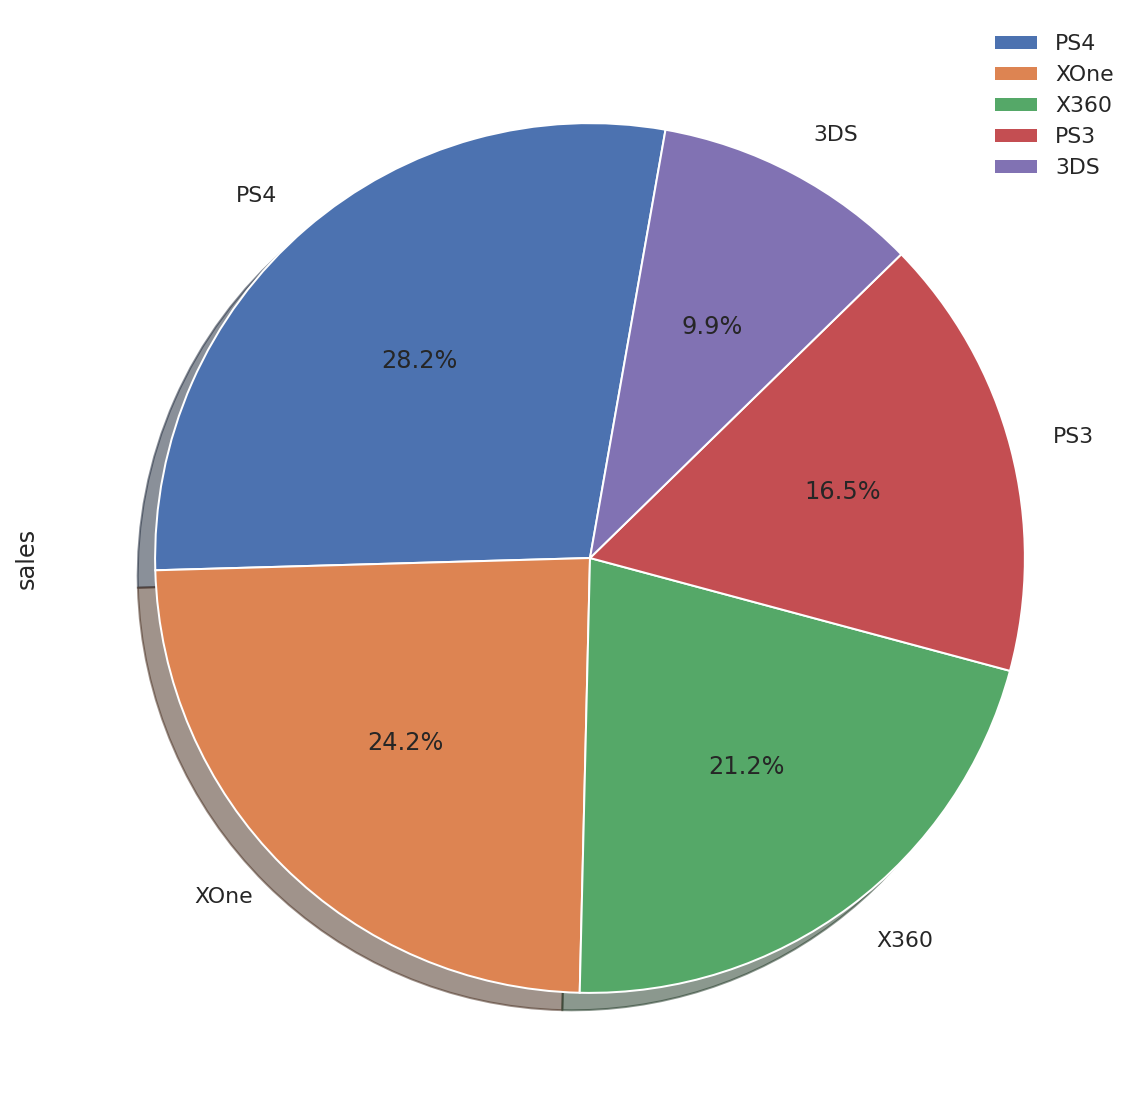

Европа


,platform,sales
4,PS4,141.09
3,PS3,67.81
10,XOne,51.59
9,X360,42.52
0,3DS,30.96


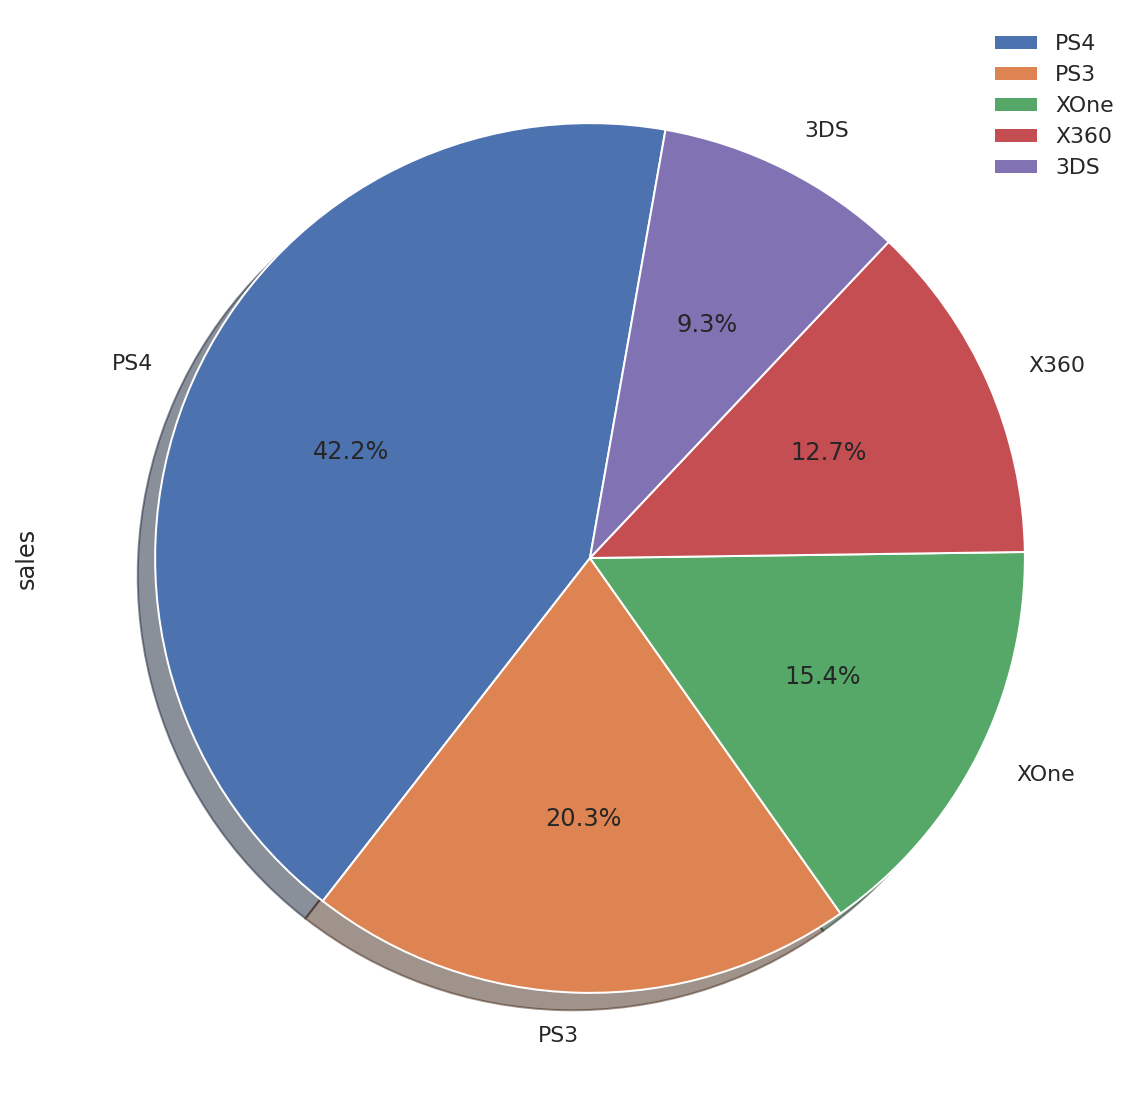

Япония


,platform,sales
0,3DS,67.81
3,PS3,23.35
6,PSV,18.59
4,PS4,15.96
8,WiiU,10.88


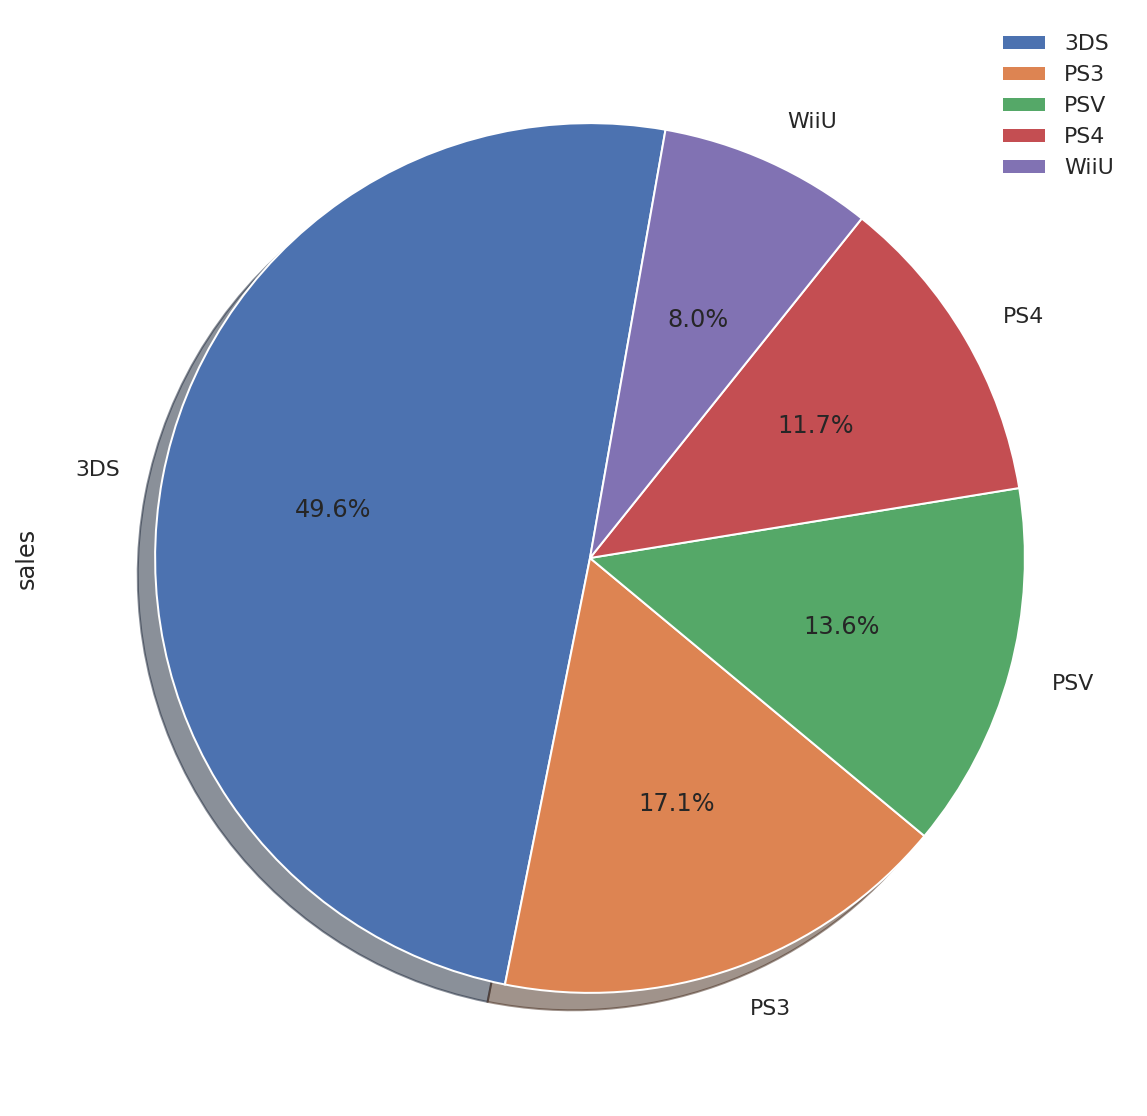

In [31]:
# формируем отдельные таблицы по каждому из регионов
na_platform = data[['platform', 'na_sales']].rename(columns={'na_sales': 'sales'})
eu_platform = data[['platform', 'eu_sales']].rename(columns={'eu_sales': 'sales'})
jp_platform = data[['platform', 'jp_sales']].rename(columns={'jp_sales': 'sales'})

# функция для вывода топ 5 платформ в зависимости от суммарных продаж на ней и круговых диаграмм по этим 5 платформам
def sales_platform(value, region):
    print(value)
    x=region.groupby('platform')['sales'].sum().reset_index().sort_values(by='sales', ascending = False).head()
    display(x)
    x.plot.pie(y='sales', labels=x['platform'], autopct='%1.1f%%', shadow=True, startangle=80)
    plt.show()

# формируем топ 5 по каждому из регионов    
sales_platform('Северная Америка', na_platform)
sales_platform('Европа', eu_platform)    
sales_platform('Япония', jp_platform)

Видно, что Япония отличается от Европы и Северной Америки. В Евпропе и Америке лидерскую позицию занимает PS4, площадка же 3DS занимает только 5 место. в Японии же наоборот - 3DS топовая площадка, а PS4 ушла на 4 место. 
В целом по Европе и Америке в том входят одни и те же площадки. Это PS4, Ps3, XOne, X360 и 3DS. 
В Японии в топе появились две площадки, которых нет в топах других стран. Это - PSV и WiiU.

Рассмотрим какое распределение по жанрам в разных регионах продаж игр:

Северная Америка


,genre,sales
0,Action,126.05
8,Shooter,109.74
10,Sports,65.27
7,Role-Playing,46.40
3,Misc,27.49


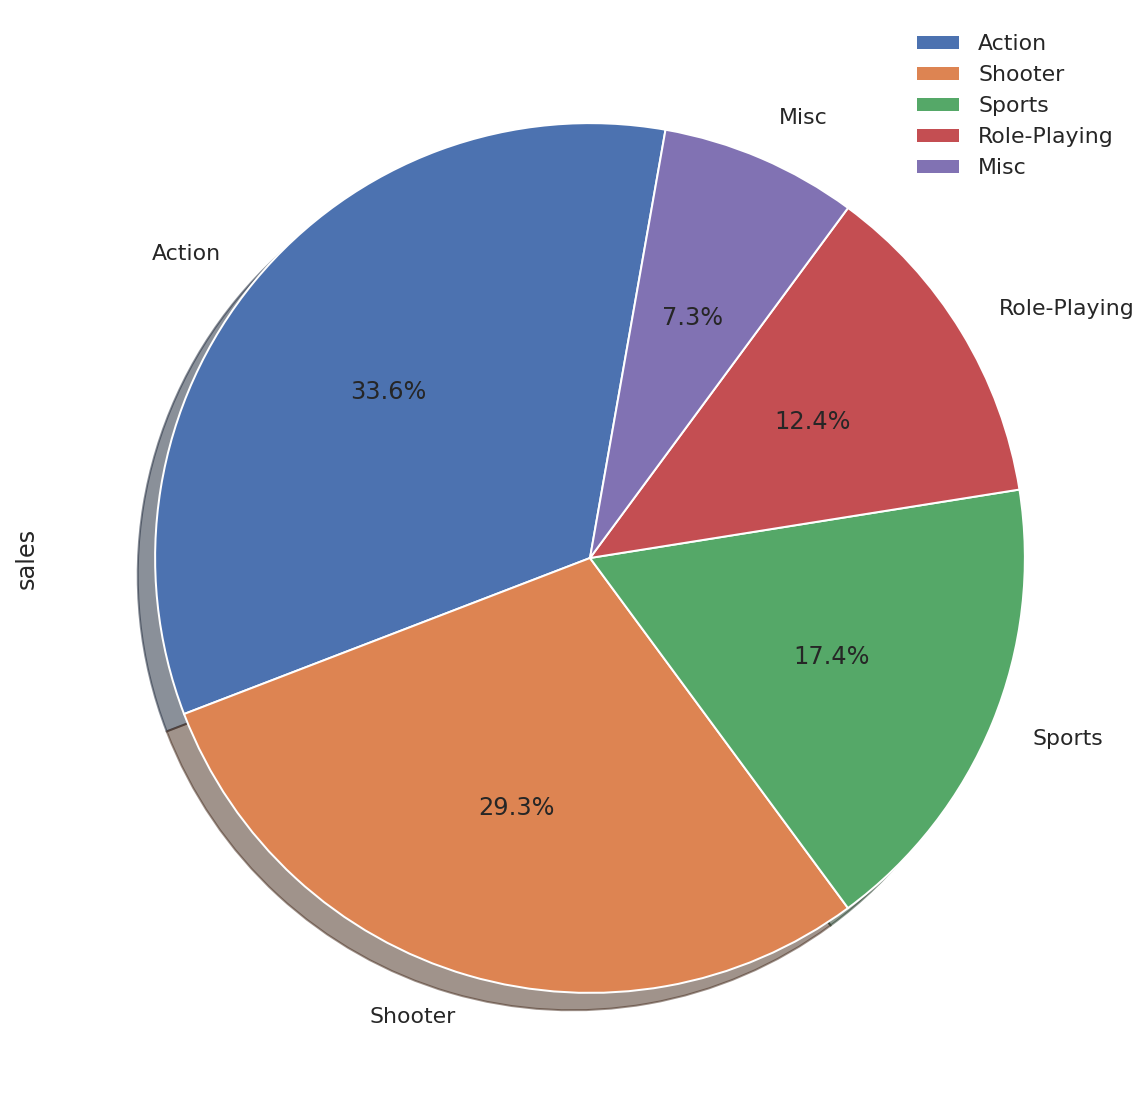

Европа


,genre,sales
0,Action,118.13
8,Shooter,87.86
10,Sports,60.52
7,Role-Playing,36.97
6,Racing,20.19


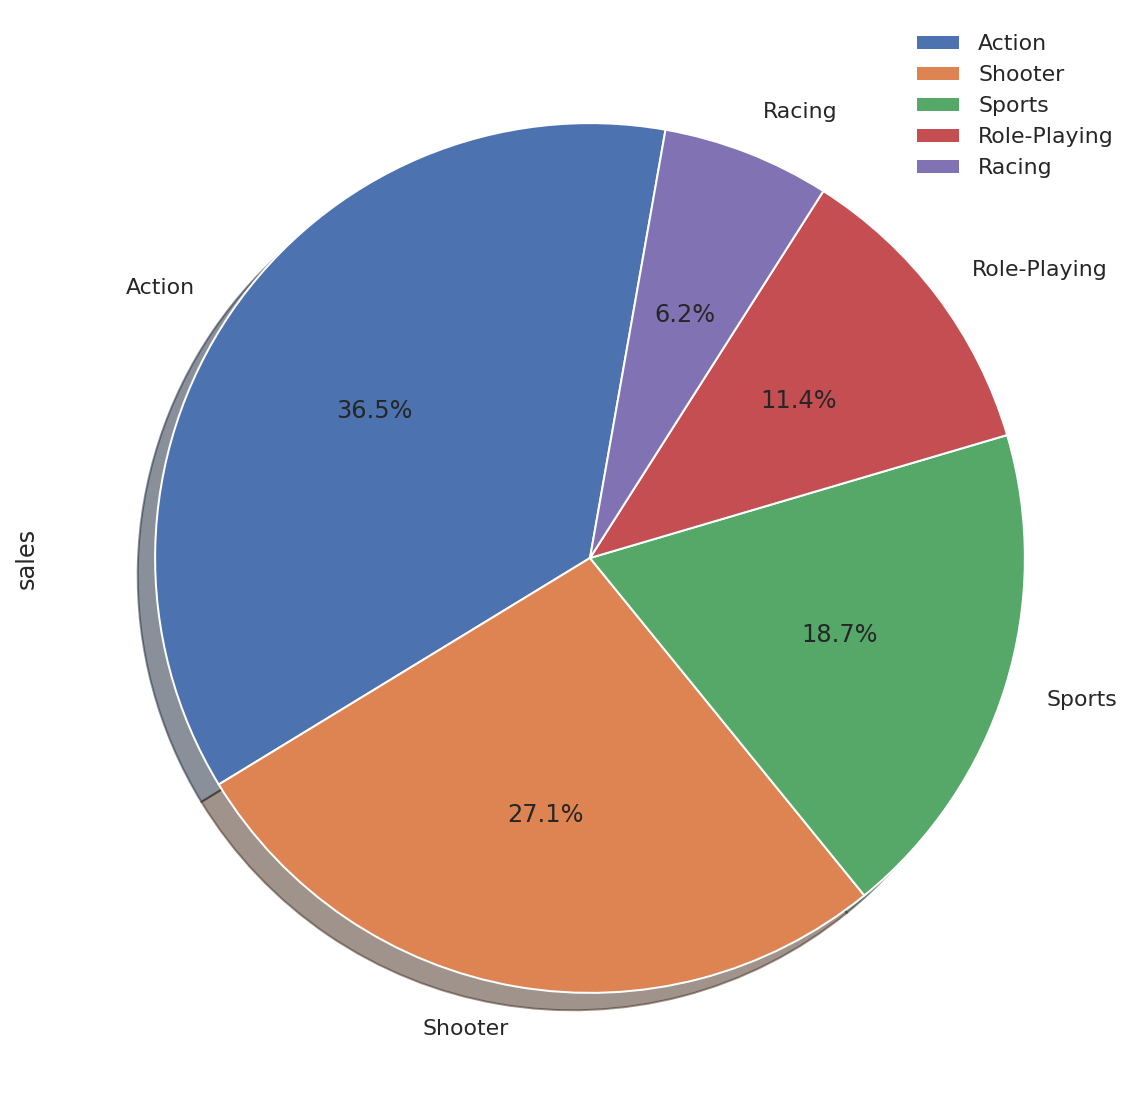

Япония


,genre,sales
7,Role-Playing,51.04
0,Action,40.49
3,Misc,9.20
2,Fighting,7.65
8,Shooter,6.61


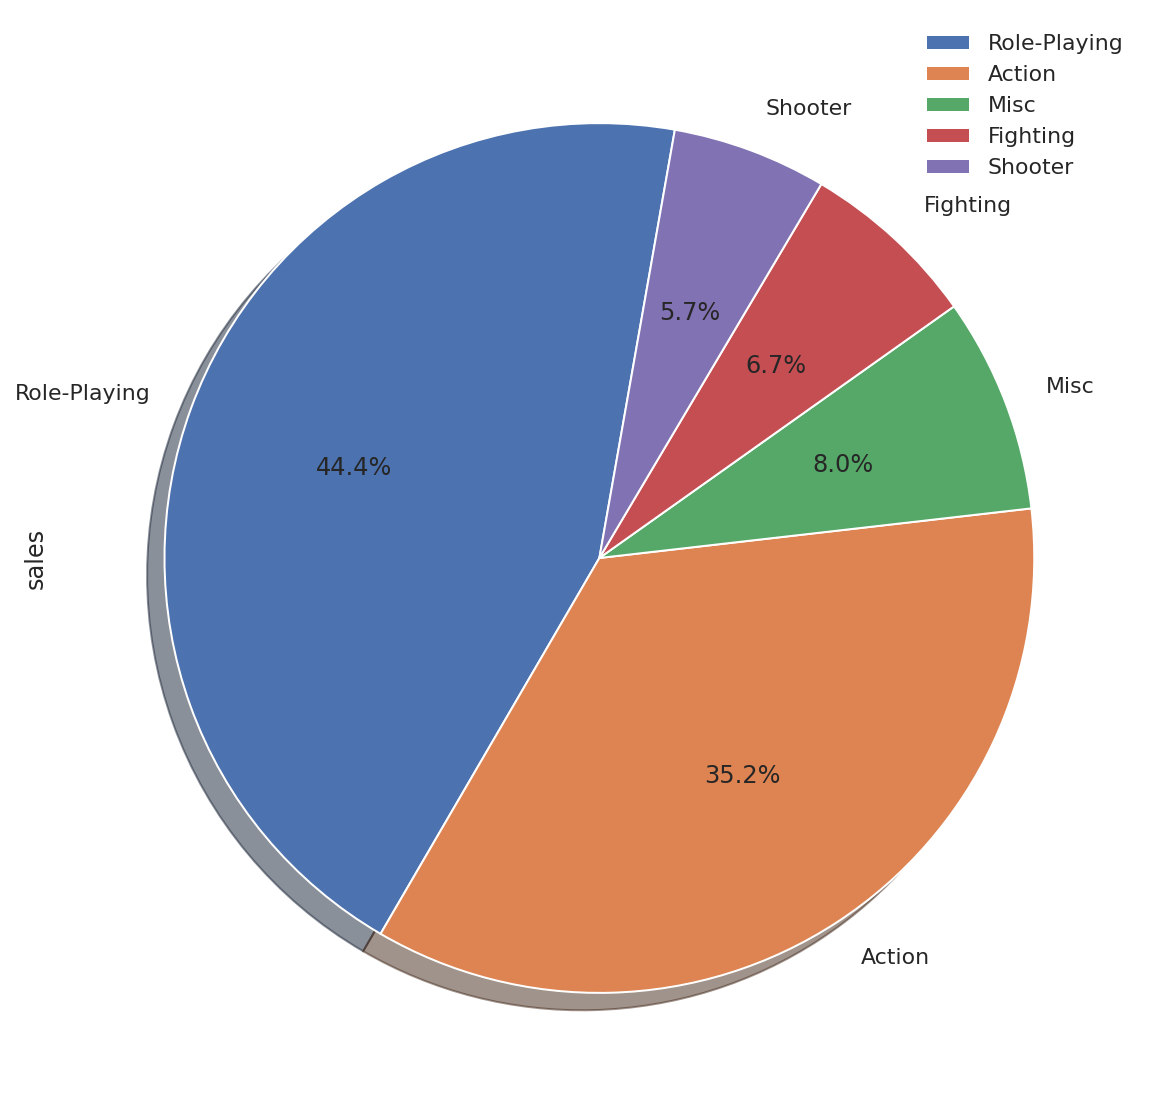

In [32]:
# создаем отдельные таблицы по каждому из регионов с жанром игры и продажами в данном регионе
na_g = data[['genre', 'na_sales']].rename(columns={'na_sales': 'sales'})
eu_g = data[['genre', 'eu_sales']].rename(columns={'eu_sales': 'sales'})
jp_g = data[['genre', 'jp_sales']].rename(columns={'jp_sales': 'sales'})

# функция для вывода топ 5 жанров в зависимости от суммарных продаж по ним и построения круговой диаграммы
def sales_genre(value, region):
    print(value)
    x=region.groupby('genre')['sales'].sum().reset_index().sort_values(by='sales', ascending = False).head()
    display(x)
    x.plot.pie(y='sales', labels=x['genre'], autopct='%1.1f%%',
        shadow=True, startangle=80)
    plt.show()

# формируем топ 5 по каждому из регионов    
sales_genre('Северная Америка', na_g)
sales_genre('Европа', eu_g)    
sales_genre('Япония', jp_g)

Тут данные также Япония сильно отличается от Америки и Европы. 
В рейтинг Америки и Европы вошли одни жанры. Это Action, Shooter, Sports, Role-Playing, с первого по четвертое место соответственно. Отличаются только жанры на последнем месте в топ 5. Для Америки им стал Misc, для Европы - Racing. 

В Японии же на первом месте Role-Playing, только на втором Action, затем идет Misc, после Fighting, который не попал в топы Европы и Америки, и наконец Shooter только на пятом месте. 

Проверим как рейтинг игры влияет на их продажи в разных регионах:

Северная Америка


,rating,sales
2,M,165.21
4,unknown,89.42
0,E,79.05
1,E10+,54.24
3,T,49.79


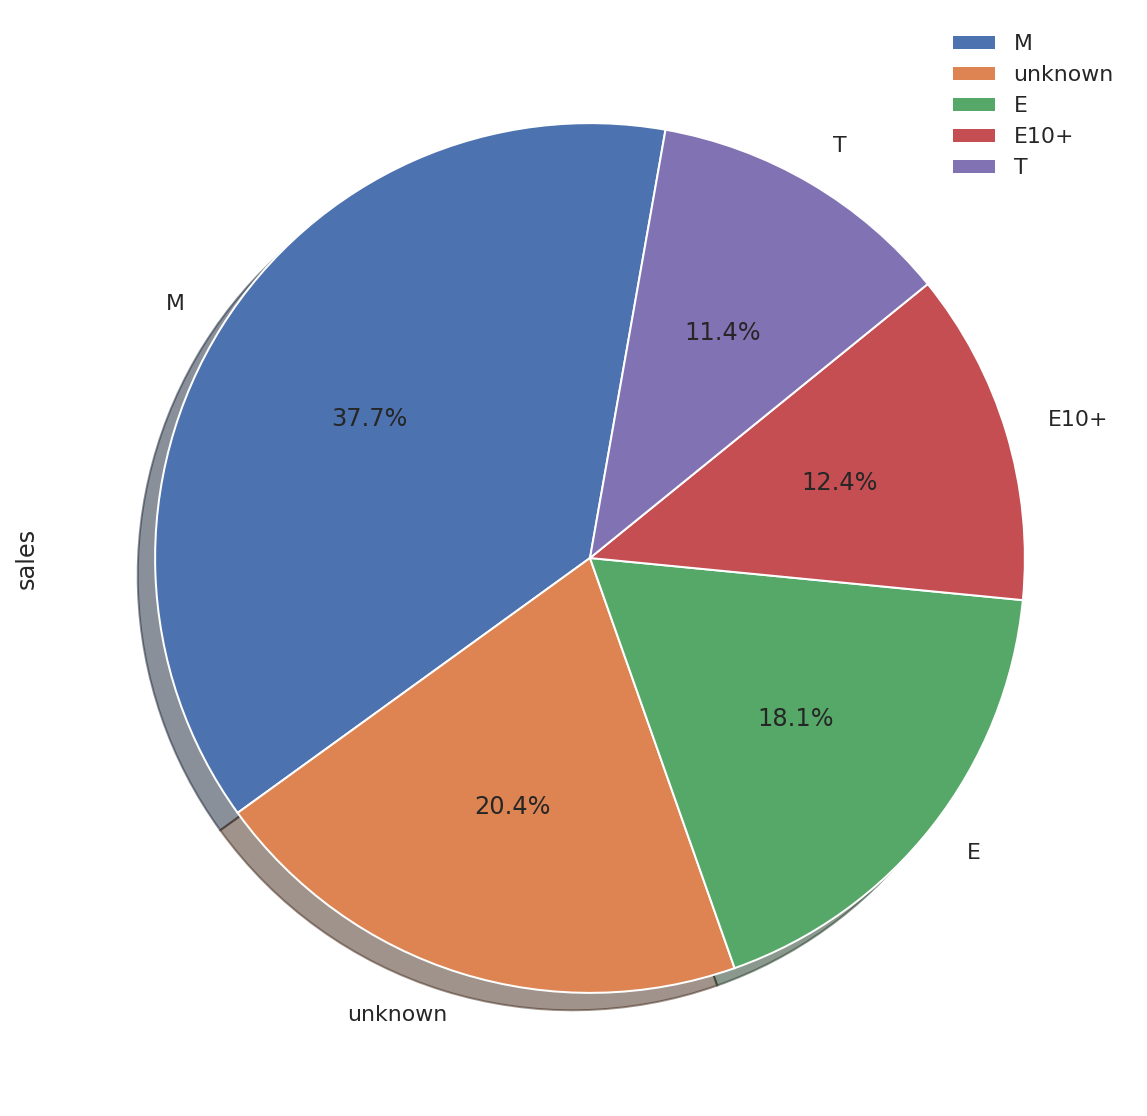

Европа


,rating,sales
2,M,145.32
0,E,83.36
4,unknown,78.91
1,E10+,42.69
3,T,41.95


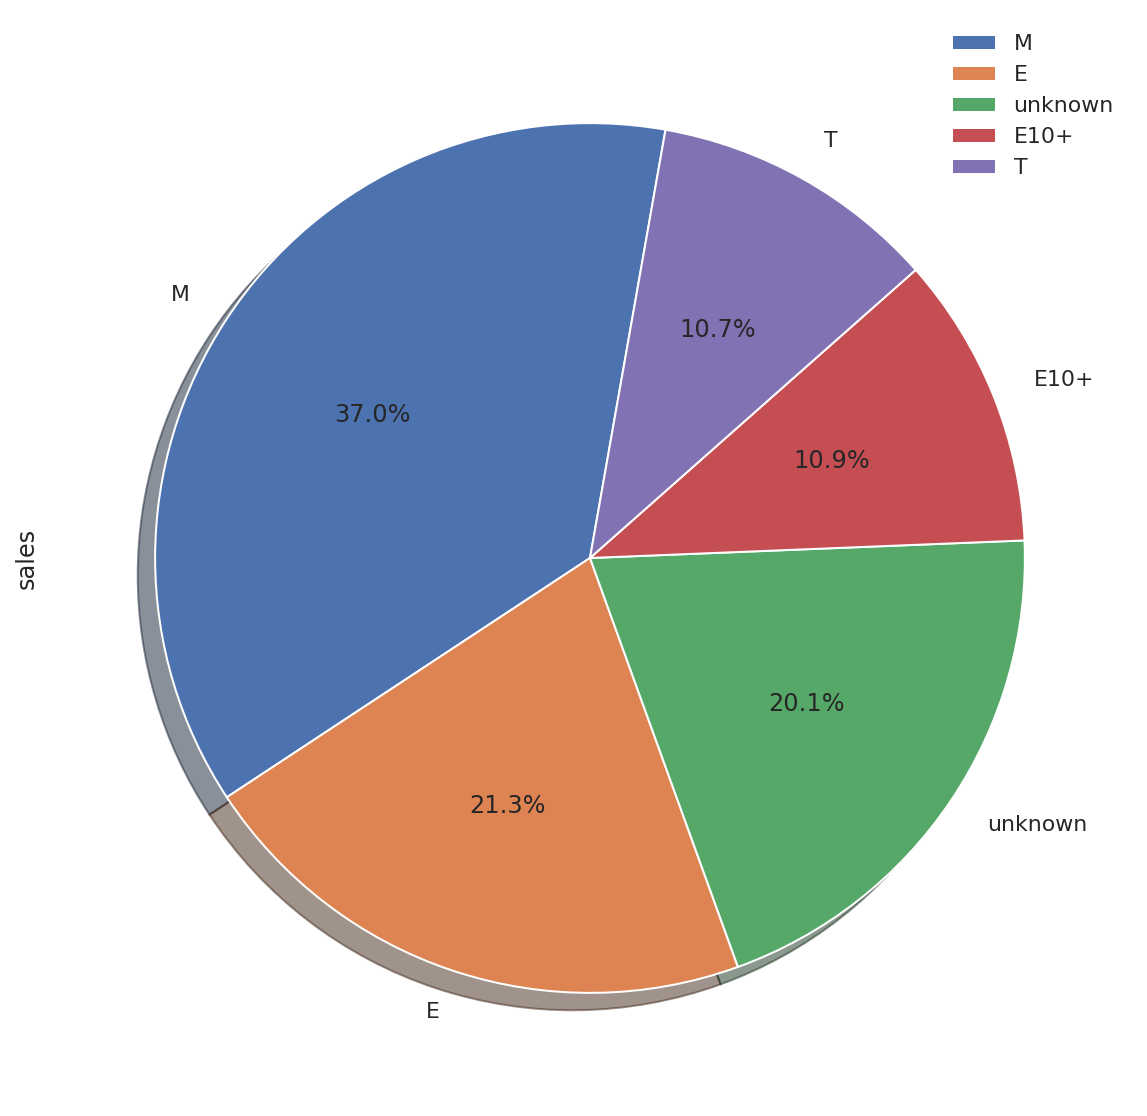

Япония


,rating,sales
4,unknown,85.05
3,T,20.59
0,E,15.14
2,M,14.11
1,E10+,5.89


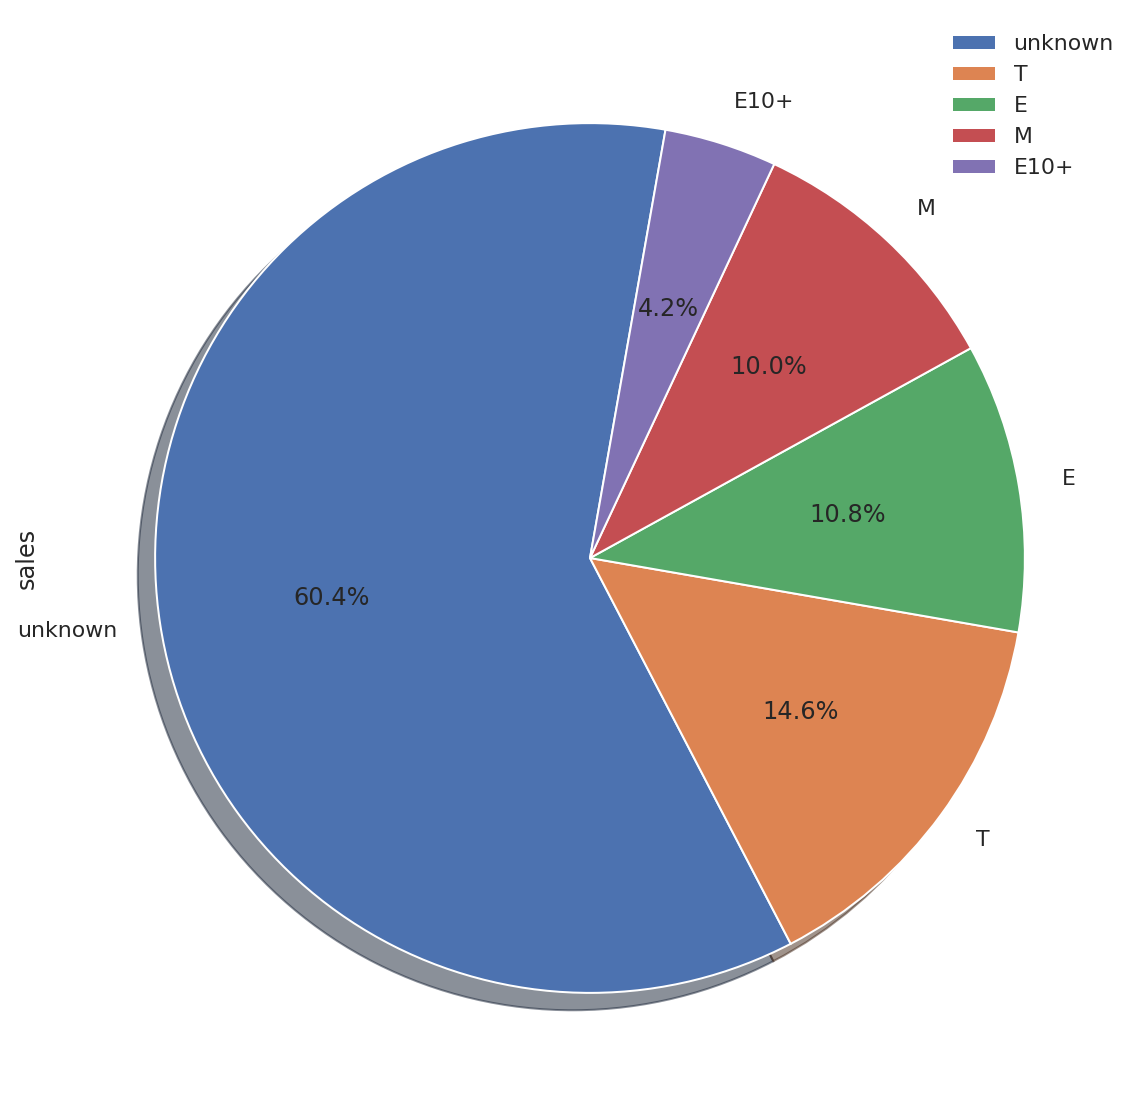

In [33]:
# создаем отдельные таблицы для каждого из регионов
na_rating = data[['rating', 'na_sales']].rename(columns={'na_sales': 'sales'})
eu_rating = data[['rating', 'eu_sales']].rename(columns={'eu_sales': 'sales'})
jp_rating = data[['rating', 'jp_sales']].rename(columns={'jp_sales': 'sales'})

# функция для вывода топ 5 рейтингов игр в зависимости от суммарных продаж по ним и построения круговой диаграммы
def sales_rating(value, region):
    print(value)
    x=region.groupby('rating')['sales'].sum().reset_index().sort_values(by='sales', ascending = False).head()
    display(x)
    x.plot.pie(y='sales', labels=x['rating'],
               autopct='%1.1f%%',shadow=True, startangle=80)
    plt.show()

# формируем топ 5 по каждому из регионов    
sales_rating('Северная Америка', na_rating)
sales_rating('Европа', eu_rating)    
sales_rating('Япония', jp_rating)

Как всегда, Япония отличается от других стран. В ней чаще всего продают игры без рейтинга. Вероятно, что это связано с тем, что в Японии свои рейтинги, которые присваиваются играм. Они отличаются от европейских или американских. 

В Америке и Европе в лидерах игры с рейтингами М и Е, а также без рейтинга. 

#### Вывод

Пользователи Европы и Северной Америки в целом похожи по предпочтениям. Основная платформа, где они покупают игры - PS4. В их топы попали одни и те же платформы (PS4, Ps3, XOne, X360 и 3DS). Европейцы лишь немного больше предпочитают PS3, она у них на втором месте, американцы немного меньше, она у них на четвертом месте. 

По жанрам также между ними мало отличий. Первые 4 места занимают Action, Shooter, Sports, Role-Playing. Отличается лишь последний жанр в топе. Для Америки он Misc, для Европы Racing. 
Американцы и европейцы предпочитают игры с рейтингами М и Е, или без рейтинга. 
В целом в Европе и Америке имеет смысл придерживаться примерно одной стратегии продаж. Их пользователь во многом имеет схожие предпочтения. 

Пользователи из Японии сильно отличаются от остальных. Больше всего продаж у них на площадке 3DS. В топе есть площадки, которые не входят в топ в Америке и Европе, PSV и WiiU. PS4 и PS3 они также любят. 
Предпочитаемые жанры также отличаются. На первом месте Role-Playing. Популярные в других странах Action и Shooter заняли только второе и пятое место соответственно. На третьем месте Misc, на четвертом Fighting. 
В Японии основная доля игр приходится на игры, для которых рейтинг не указан.
Для получения прибыли на этом рынке требуется подготовить отдельную маркетинговую стратегию, и учесть их особенные предпочтения. 

### Проверка гипотез 

Нам необходимо проверить два утверждения:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Для проверки необходимо убрать пропуски в столбце user_score в нашей таблице

In [34]:
# создаем data_score добавляем все строки таблицы data, где нет пропусков в значениях столбца user_score
data_score = data.dropna(subset=['user_score'])

На основе первого утверждения формируем наши гипотезы:

Пусть Н0 будет - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная ей Н1 - Средние пользовательские рейтинги платформ Xbox One и PC разные

Возьмем критический уровень статистической значимости не более 5%

In [35]:
# т-тест для проверки гипотезы о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые
sample_xone = data_score[data_score['platform'] == 'XOne']['user_score']
sample_pc = data_score[data_score['platform'] == 'PC']['user_score']

results = st.ttest_ind(sample_xone, sample_pc)
alpha = 0.05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Отвергнуть нулевую гипотезу о том, что рейтинги одинаковы не получилось. Посчитаем какой средний пользовательский рейтинг на каждой из платформ:

In [36]:
# считаем среднее значение пользовательского рейтинга для платформ XOne и PC
print('Средний пользовательский рейтинг XOne:', sample_xone.mean())
print('Средний пользовательский рейтинг PC:', sample_pc.mean())

Средний пользовательский рейтинг XOne: 6.521428571428572
Средний пользовательский рейтинг PC: 6.2696774193548395


Видим, что пользовательские рейтинги данных платформ, действительно, почти одинаковы. 

Теперь проверим второе утверждение. 

Пусть Н0 будет - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковы

Альтернативная ей Н1 - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Критический уровень статистической значимости берем также 5%

In [37]:
# т-тест для проверки гипотезы средние пользовательские 
# рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковы
sample_action = data_score[data_score['genre'] == 'Action']['user_score']
sample_sports = data_score[data_score['genre'] == 'Sports']['user_score']

results = st.ttest_ind(sample_action, sample_sports)
alpha = 0.05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  1.0517832389140023e-27
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергается. Проверим какие средние пользовательские рейтинги у данных жанров:

In [38]:
# считаем среднее значение пользовательского рейтинга для жанров Ation и Sports
print('Средний пользовательский рейтинг для жанра Action:', sample_action.mean())
print('Средний пользовательский рейтинг для жанра Sports:', sample_sports.mean())

Средний пользовательский рейтинг для жанра Action: 6.837532133676092
Средний пользовательский рейтинг для жанра Sports: 5.238124999999999


Действительно, пользовательские рейтинги отличаются. 

#### Вывод

Мы проверили два утверждения:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

После проведения статистических тестов, мы узнали, что:
- средние пользовательские рейтинги платформ Xbox One и PC статистически значимо не различаются
- средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») статистически значимо различаются 

### Общий вывод

В процессе обзора данных и предобработки были выявлены пропуски в данных по названию игры, ее жанру и году выпуска игры. Так как основной анализ строится именно на этих данных, то мы удалили такие строки. Удалено не более 2% от всех данных. 

Наша цель была в том, чтобы выявить закономерности, которые позволят в будущем году увеличить продажи игр. 
Мы выявили, что с 2012 года количество выпущенных игр и сумма продаж начали падать. Пик выпуска и продаж приходился на 2008-2009 года. В среднем платформы по выпуску игр "живут" примерно 10 лет, затем количество игр, выпущенных на них, и суммарные продажи сильно падают. 

Было принято решение оценивать актуальную ситуацию именно по данным начиная с 2012 года. По глобальным продажам в топ 5 вошли платформы PS4, PS3, XOne, 3DS, X360. Из них мы выявили самые перспективные - это PS4 и XOne. Также отметили платформу 3DS. Продажи на ней за последние годы падают, но они выше, чем на других. Стоит обратить внимание на нее тоже. 

Обратили внимание, что в контексте самой крупной и перспективной платформы PS4, оценки пользователей имеют отрицательную корреляцию с уровнем продаж. А вот оценки критиков линейно немного больше влияют на продажи игр. Их коэффициент корреляции составил 0,4. 
В рамках глобальных продаж наибольшую популярность имеют игры жанров Shooter, Sports и Role-Playing. Стоит обратить внимание на жанр Platform: у него суммарно не слишком высокие продажи, а вот средний ценник довольно высок. Это говорит нам о том, что таких игр пока не очень много и при этом они приносят хорошие продажи.

Также отдельно мы рассмотрели данные по пользователям из Северной Америки, Европы и Японии. 
Пользователи из Северной Америки и Европы очень похожи. Самая популярная платформа PS4, самый популярный жанр Action, чаще всего покупают игры с рейтингом М. 
Японские пользователи оказались другими. Их топовая платформа 3DS, самый продаваемый жанр - Role-Playing, чаще всего они покупают игры без рейтинга, вероятно в связи с тем, что у Японии есть свои рейтинги. 
Рекомендуем сформировать отдельные маркетинговые стратегии для пользователей разных регионов исходя из этих данных. 

У нас было две гипотезы, которые требовалось проверить:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

После проведения статистических тестов, мы узнали, что:
- средние пользовательские рейтинги платформ Xbox One и PC статистически значимо не различаются
- средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») статистически значимо различаются 